# Load modules and data

- дропнути education
- філити inguries by "0"
- категорізувати mariage

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from tqdm import tqdm_notebook as tqdm
import pickle
from IPython.core.display import display, HTML

from matplotlib import pylab as plt
%matplotlib inline

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_colwidth", 500)
pd.set_option("display.max_columns", 200)

In [2]:
# data_start = pd.read_csv('QoL_army_2_new.csv', sep=';', na_values=['*'], 
#                    decimal=',').drop(['Unnamed: 20', 'University'], axis=1)

data_start = pd.read_excel('Dmytro_claster.xlsx', sheet_name=1).rename(columns={'Education (1 – School, 2 – Bachelor, 3 - Master, 4 - PhD/D.Sc)':'education',
       '4. Mariage (3 - No Mariage, 5 - Mariage; 2 - Devorsed/ live sparate, 1 - Widow, 4 - civil mariage)':'mariage',
       '8. Duration of military service, month':'military_duration',
       '9. Time of stay in the conflict zone (total duration, months)':'conflict_duration',
       '10. War Injuries (NO - 0; YES - 1)':'injuries',
       '12. Duration of rehabilitation after injury (months)':'rehabilitation_duration', 
       'University (1 - Military University, 2- University of Physical Culture, 3 - Lviv State University of Internal Affairs, 4 - military service)':'university'})

data_start['Sex'] = data_start['Sex'].fillna('M').map({'M':0,'F':1})
data_start['injuries'] = data_start['injuries'].fillna(0).astype(int)
data_start['mariage'] = data_start['mariage'].fillna(3).astype(int)
data_start['mariage_cat'] = data_start['mariage'].values


data = data_start.copy()
data.head()
#data_start['University'] = data_start[['Duration_CZ','University']].apply(lambda row: row[1] if row[0] == 0 else '1_ato', axis=1)
#data_start['University'].unique()

,Sex,Age,education,mariage,military_duration,conflict_duration,injuries,rehabilitation_duration,T-anxiety,S-anxiety,university,PF,RP,BP,GH,VT,SF,RE,MH,mariage_cat
0,0,26,1.0,4,84,12.0,0,0,52.0,44.0,1,95.0,0.0,42.0,62.0,55.0,37.5,100.0,84.0,4
1,0,21,NaN,3,48,0.0,0,0,44.0,49.0,1,100.0,100.0,90.0,70.0,50.0,50.0,100.0,60.0,3
2,0,27,1.0,3,72,3.0,0,0,43.0,35.0,1,100.0,100.0,41.0,77.0,75.0,87.5,100.0,92.0,3
3,0,20,1.0,3,36,0.0,0,0,50.0,38.0,1,100.0,100.0,62.0,92.0,75.0,75.0,100.0,76.0,3
4,0,20,1.0,3,36,0.0,0,0,43.0,36.0,1,100.0,100.0,90.0,90.0,100.0,100.0,100.0,100.0,3


In [3]:
data.columns

Index(['Sex', 'Age', 'education', 'mariage', 'military_duration',
       'conflict_duration', 'injuries', 'rehabilitation_duration', 'T-anxiety',
       'S-anxiety', 'university', 'PF', 'RP', 'BP', 'GH', 'VT', 'SF', 'RE',
       'MH', 'mariage_cat'],
      dtype='object')

In [4]:
import pandas_profiling

profile = pandas_profiling.ProfileReport(data_start)
profile.to_file(outputfile="profile.html")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 20 columns):
Sex                        425 non-null int64
Age                        425 non-null int64
education                  371 non-null float64
mariage                    425 non-null int32
military_duration          425 non-null int64
conflict_duration          424 non-null float64
injuries                   425 non-null int32
rehabilitation_duration    425 non-null int64
T-anxiety                  374 non-null float64
S-anxiety                  389 non-null float64
university                 425 non-null int64
PF                         391 non-null float64
RP                         399 non-null float64
BP                         414 non-null float64
GH                         407 non-null float64
VT                         411 non-null float64
SF                         410 non-null float64
RE                         399 non-null float64
MH                         391 non-null float

# Data preprocessing

In [6]:
categoric_columns = [
#     'Sex',
 'education',
 'mariage_cat',
#  'injuries',
 'university',
                    ]

numeric_columns = [arg for arg in data.columns if arg not in categoric_columns]
numeric_columns

['Sex',
 'Age',
 'mariage',
 'military_duration',
 'conflict_duration',
 'injuries',
 'rehabilitation_duration',
 'T-anxiety',
 'S-anxiety',
 'PF',
 'RP',
 'BP',
 'GH',
 'VT',
 'SF',
 'RE',
 'MH']

In [7]:
data[['military_duration',
 'conflict_duration',
 'rehabilitation_duration']] = data[['military_duration',
 'conflict_duration',
 'rehabilitation_duration']].fillna(0)



for arg in categoric_columns:
    data[arg] = data[arg].fillna('unk').astype('category')

In [75]:
for arg in ['PF',
       'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH']:
    data[arg + '_cat'] = pd.cut(data[arg], 
                                      bins=[0, 50, 75, 100], 
                                      include_lowest=True, 
                                      labels=['low', 'mid', 'high'])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 28 columns):
Sex                        425 non-null int64
Age                        425 non-null int64
education                  425 non-null category
mariage                    425 non-null int32
military_duration          425 non-null int64
conflict_duration          425 non-null float64
injuries                   425 non-null int32
rehabilitation_duration    425 non-null int64
T-anxiety                  374 non-null float64
S-anxiety                  389 non-null float64
university                 425 non-null category
PF                         391 non-null float64
RP                         399 non-null float64
BP                         414 non-null float64
GH                         407 non-null float64
VT                         411 non-null float64
SF                         410 non-null float64
RE                         399 non-null float64
MH                         391 non-null f

In [76]:
data.dropna().shape

(278, 28)

In [77]:
data_clear = data.dropna().copy()

## Fix ATO

In [79]:
data_clear['university'].value_counts()

1    91
4    69
3    69
2    49
Name: university, dtype: int64

In [80]:
# for arg in categoric_columns:
#     data_clear[arg] = data_clear[arg].fillna('unk').astype('category')
data_clear = pd.get_dummies(data_clear.drop(['university', 'education'], axis=1))

In [81]:
#data['University'] = data[['Duration_CZ','University']].apply(lambda row: row[1] if row[0] == 0 else '1_ato', axis=1)
#data['University'].unique()
data.shape, data_clear.shape

((425, 28), (278, 46))

In [82]:
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 423
Data columns (total 46 columns):
Sex                        278 non-null int64
Age                        278 non-null int64
mariage                    278 non-null int32
military_duration          278 non-null int64
conflict_duration          278 non-null float64
injuries                   278 non-null int32
rehabilitation_duration    278 non-null int64
T-anxiety                  278 non-null float64
S-anxiety                  278 non-null float64
PF                         278 non-null float64
RP                         278 non-null float64
BP                         278 non-null float64
GH                         278 non-null float64
VT                         278 non-null float64
SF                         278 non-null float64
RE                         278 non-null float64
MH                         278 non-null float64
mariage_cat_1              278 non-null uint8
mariage_cat_2              278 non-null uint8

In [83]:
data_clear.columns

Index(['Sex', 'Age', 'mariage', 'military_duration', 'conflict_duration',
       'injuries', 'rehabilitation_duration', 'T-anxiety', 'S-anxiety', 'PF',
       'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH', 'mariage_cat_1',
       'mariage_cat_2', 'mariage_cat_3', 'mariage_cat_4', 'mariage_cat_5',
       'PF_cat_low', 'PF_cat_mid', 'PF_cat_high', 'RP_cat_low', 'RP_cat_mid',
       'RP_cat_high', 'BP_cat_low', 'BP_cat_mid', 'BP_cat_high', 'GH_cat_low',
       'GH_cat_mid', 'GH_cat_high', 'VT_cat_low', 'VT_cat_mid', 'VT_cat_high',
       'SF_cat_low', 'SF_cat_mid', 'SF_cat_high', 'RE_cat_low', 'RE_cat_mid',
       'RE_cat_high', 'MH_cat_low', 'MH_cat_mid', 'MH_cat_high'],
      dtype='object')

In [16]:
# data_end = data.drop(['Osobysta tryv', 'Sytuatyv tryv','100_cross', '3_km_cross'], axis=1)
# data_end.info()

In [17]:
# data_end.dropna().shape

# Binarization

In [84]:
# for arg in ['PF',
#        'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH']:
#     data_clear[arg + '_cat'] = pd.cut(data_clear[arg], 
#                                       bins=[0, 50, 75, 100], 
#                                       include_lowest=True, 
#                                       labels=['low', 'mid', 'high'])
    
# data_clear.info()

In [85]:
data_clear.columns

Index(['Sex', 'Age', 'mariage', 'military_duration', 'conflict_duration',
       'injuries', 'rehabilitation_duration', 'T-anxiety', 'S-anxiety', 'PF',
       'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH', 'mariage_cat_1',
       'mariage_cat_2', 'mariage_cat_3', 'mariage_cat_4', 'mariage_cat_5',
       'PF_cat_low', 'PF_cat_mid', 'PF_cat_high', 'RP_cat_low', 'RP_cat_mid',
       'RP_cat_high', 'BP_cat_low', 'BP_cat_mid', 'BP_cat_high', 'GH_cat_low',
       'GH_cat_mid', 'GH_cat_high', 'VT_cat_low', 'VT_cat_mid', 'VT_cat_high',
       'SF_cat_low', 'SF_cat_mid', 'SF_cat_high', 'RE_cat_low', 'RE_cat_mid',
       'RE_cat_high', 'MH_cat_low', 'MH_cat_mid', 'MH_cat_high'],
      dtype='object')

In [87]:
from sklearn.preprocessing import MinMaxScaler

me = MinMaxScaler()

X = me.fit_transform(data_clear[['PF_cat_low', 'PF_cat_mid', 'PF_cat_high', 'RP_cat_low', 'RP_cat_mid',
       'RP_cat_high', 'BP_cat_low', 'BP_cat_mid', 'BP_cat_high', 'GH_cat_low',
       'GH_cat_mid', 'GH_cat_high', 'VT_cat_low', 'VT_cat_mid', 'VT_cat_high',
       'SF_cat_low', 'SF_cat_mid', 'SF_cat_high', 'RE_cat_low', 'RE_cat_mid',
       'RE_cat_high', 'MH_cat_low', 'MH_cat_mid', 'MH_cat_high', 'T-anxiety', 'S-anxiety']])

# Correlations

In [88]:
group_dict = {arg.split('-')[0].strip():arg.split('-')[1].strip().lower() 
                  for arg in '1 - Military University, 2- University of Physical Culture, 3 - Lviv State University of Internal Affairs, 4 - military service'.split(', ')}
import seaborn as sns

def heatMap(df, number_rows=0):
    #Create Correlation df
    corr = df.corr()
    if number_rows:
        corr = corr.head(number_rows)
    #Plot figsize
        fig, ax = plt.subplots(figsize=(int(10 * number_rows / len(corr)), 10))
    else:
        fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f",
#                annot_kws={"ha": 'left',"va": 'top'}
               )
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns, fontsize="10", ha="left");
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns, fontsize="10", va="top")
    #show plot
    plt.show()

In [89]:
data.columns

Index(['Sex', 'Age', 'education', 'mariage', 'military_duration',
       'conflict_duration', 'injuries', 'rehabilitation_duration', 'T-anxiety',
       'S-anxiety', 'university', 'PF', 'RP', 'BP', 'GH', 'VT', 'SF', 'RE',
       'MH', 'mariage_cat', 'PF_cat', 'RP_cat', 'BP_cat', 'GH_cat', 'VT_cat',
       'SF_cat', 'RE_cat', 'MH_cat'],
      dtype='object')

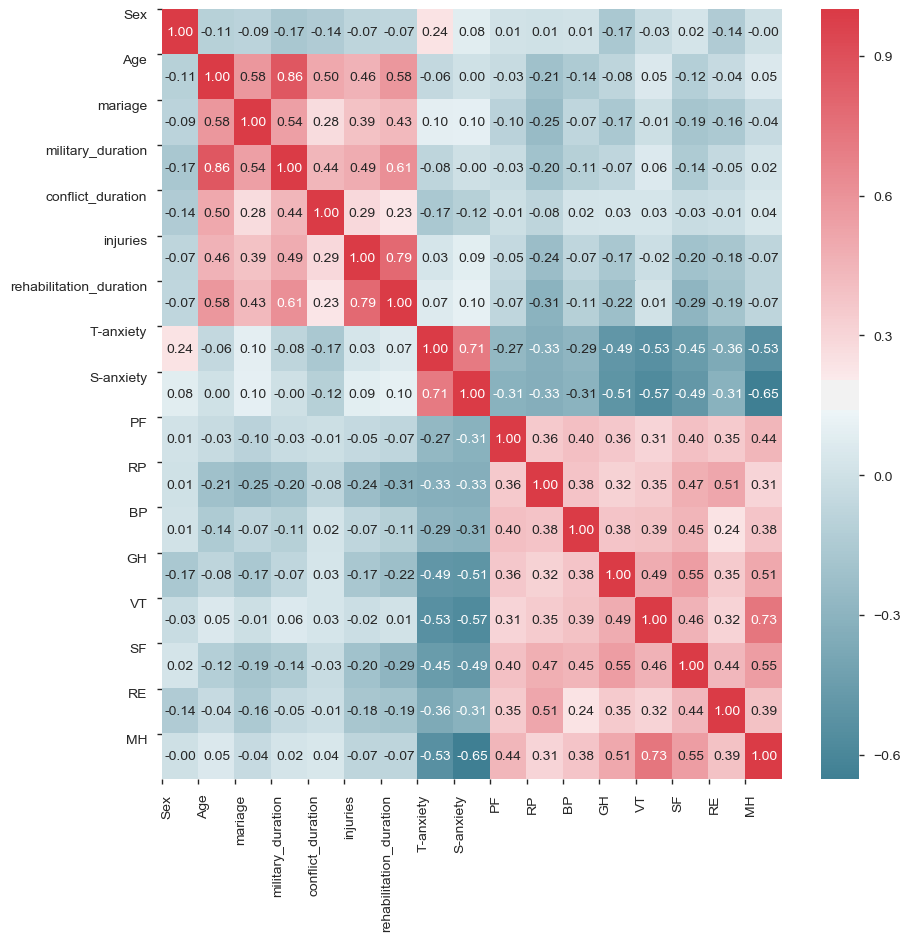

In [90]:
heatMap(data.drop(['university', ], axis=1))

Plot correlation heatmap for group: military university


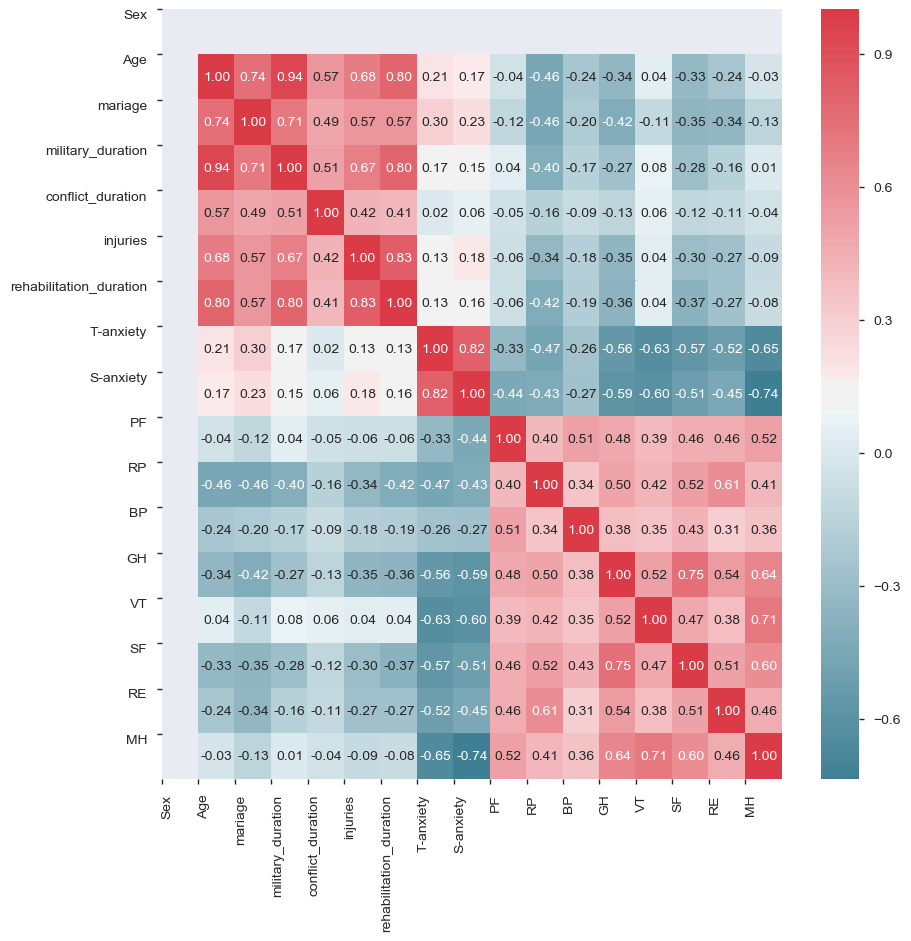

Plot correlation heatmap for group: university of physical culture


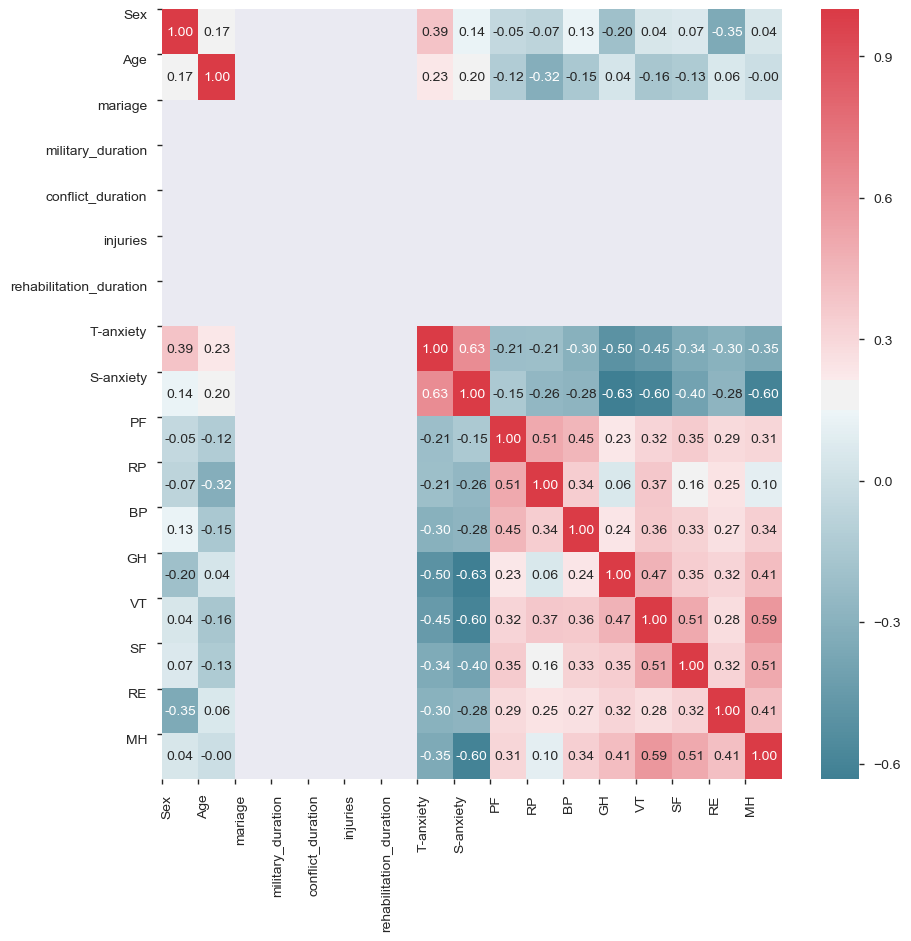

Plot correlation heatmap for group: military service


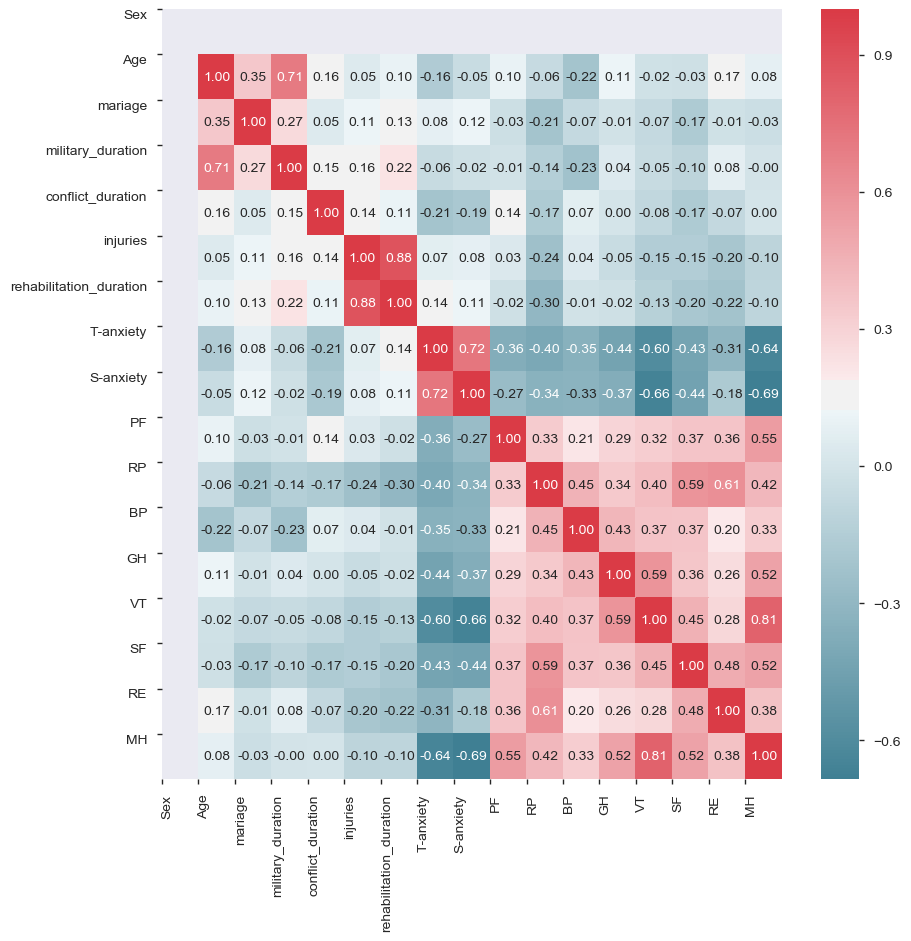

Plot correlation heatmap for group: lviv state university of internal affairs


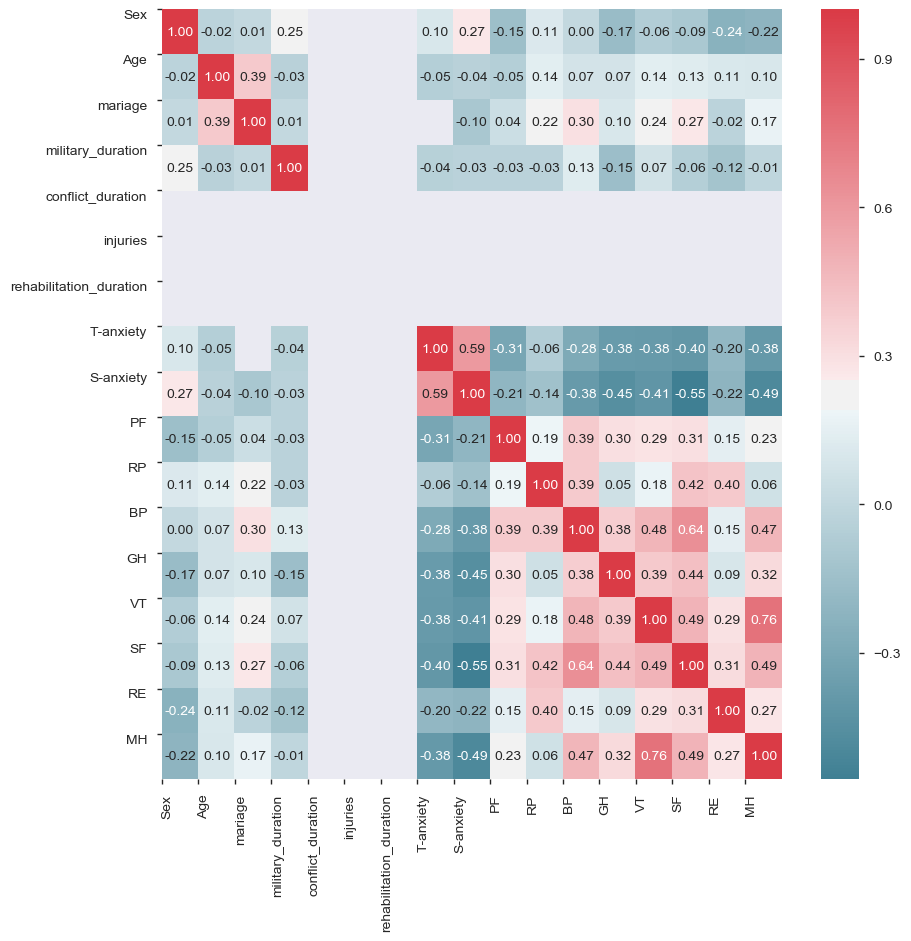

In [91]:
for arg in data.university.unique():
    print('Plot correlation heatmap for group: {}'.format(group_dict[str(arg)]))
    
    heatMap(data.query('university == @arg').drop('university', axis=1))

# TSNE plot

In [92]:
X.shape

(278, 26)

In [93]:
# build TSNE
from sklearn.manifold import TSNE
print('Building TSNE')
tsne_tables = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results_tables = tsne_tables.fit_transform(X)

Building TSNE
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 278 samples in 0.002s...
[t-SNE] Computed neighbors for 278 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 278 / 278
[t-SNE] Mean sigma: 1.048161
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.065517
[t-SNE] KL divergence after 1000 iterations: 0.573414


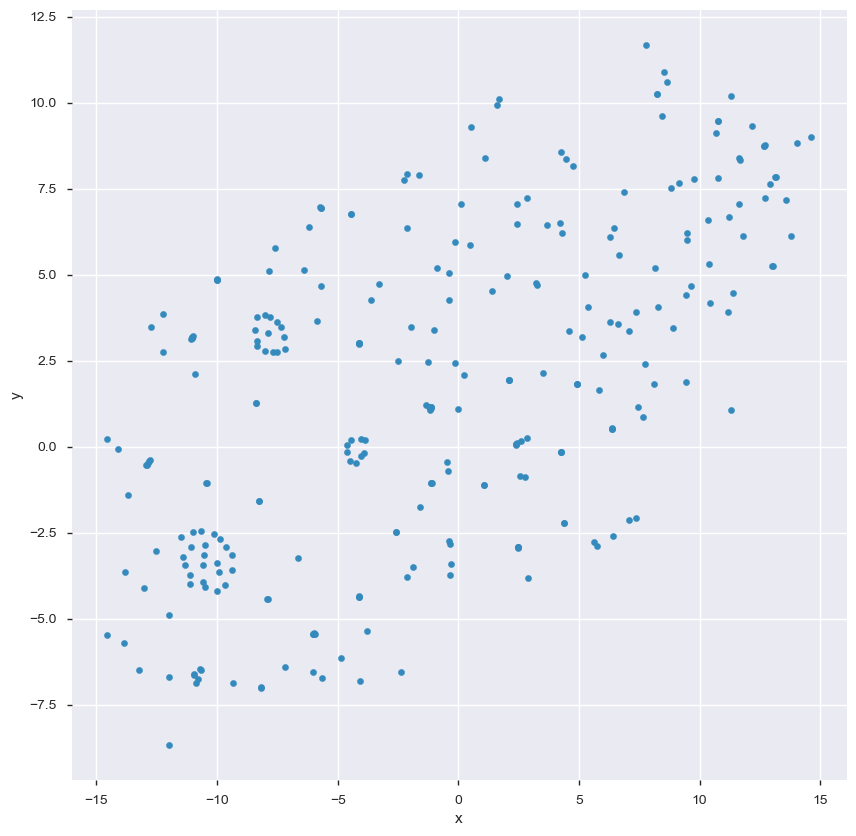

In [94]:
df_tsne = pd.DataFrame()

df_tsne['x'] = tsne_results_tables[:, 0]
df_tsne['y'] = tsne_results_tables[:, 1]

df_tsne.plot('x', 'y', kind='scatter', figsize=(10,10))

# Clasterization

In [95]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from numpy import arccos, array, dot, pi, cross
from numpy.linalg import det, norm
from sklearn.svm import OneClassSVM
from sklearn.manifold import TSNE
import seaborn as sns

# from: https://gist.github.com/nim65s/5e9902cd67f094ce65b0


def distance_numpy(A, B, P):
    """ segment line AB, point P, where each one is an array([x, y]) """
    if all(A == P) or all(B == P):
        return 0
    if arccos(dot((P - A) / norm(P - A), (B - A) / norm(B - A))) > pi / 2:
        return norm(P - A)
    if arccos(dot((P - B) / norm(P - B), (A - B) / norm(A - B))) > pi / 2:
        return norm(P - B)
    return norm(cross(A-B, A-P))/norm(B-A)


def get_number_clusters(data,
                        plot_results=True,
                        max_number=10):

    # calculate with different number of clusters
    print('Fitting KMeans')
    Sum_of_squared_distances = []
    K = range(1, max_number + 1)
    for k in tqdm(range(max_number)):
        km = KMeans(n_clusters=k + 1, n_jobs=-1)
        km = km.fit(data)
        Sum_of_squared_distances.append(km.inertia_)

    # calculate distanse
    p1 = np.array([1, Sum_of_squared_distances[0]])
    p2 = np.array([max_number, Sum_of_squared_distances[-1]])

    distances = []
    for i in range(0, max_number):
        p = np.array([i + 1, Sum_of_squared_distances[i]])
        distances.append(np.linalg.norm(
            np.cross(p2-p1, p1-p))/np.linalg.norm(p2-p1))

    number_clusters = np.argmax(distances) + 1

    if plot_results:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
        ax1.plot(K, Sum_of_squared_distances, 'bx-')
        ax1.set_xlabel('k')
        ax1.set_ylabel('Sum_of_squared_distances')
        ax1.set_title('Elbow Method For Optimal k')

        ax2.plot(K, distances, 'bx-')
        ax2.set_xlabel('k')
        ax2.set_ylabel('Distances')
        ax2.set_title('Distances to Line')

        plt.show()

    return number_clusters


from sklearn.cluster import k_means_, k_means
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler


def get_clusters(data,
                 data_tsne,
                 plot_results=True,
                 max_number=10,
                 column_label_name='label',
                 cluster_type='kmeans',
                 number_clusters=0
                 ):

    clust_result = data.dropna()
    X = MinMaxScaler().fit_transform(clust_result)

    # get the best number of clusters
    if (cluster_type == 'kmeans') & (number_clusters <= 0):
        number_clusters = get_number_clusters(
            data=X, plot_results=plot_results, max_number=max_number)


    if cluster_type == 'kmeans':

        km = KMeans(n_clusters=number_clusters, n_jobs=-1)
        km = km.fit(X)
        clust_result[column_label_name] = km.labels_

    elif cluster_type == 'dbscan':

        db = DBSCAN(eps=0.2, min_samples=200).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        clust_result[column_label_name] = db.labels_

    clust_result['x'] = data_tsne['x']
    clust_result['y'] = data_tsne['y']
    

    return clust_result

Fitting KMeans


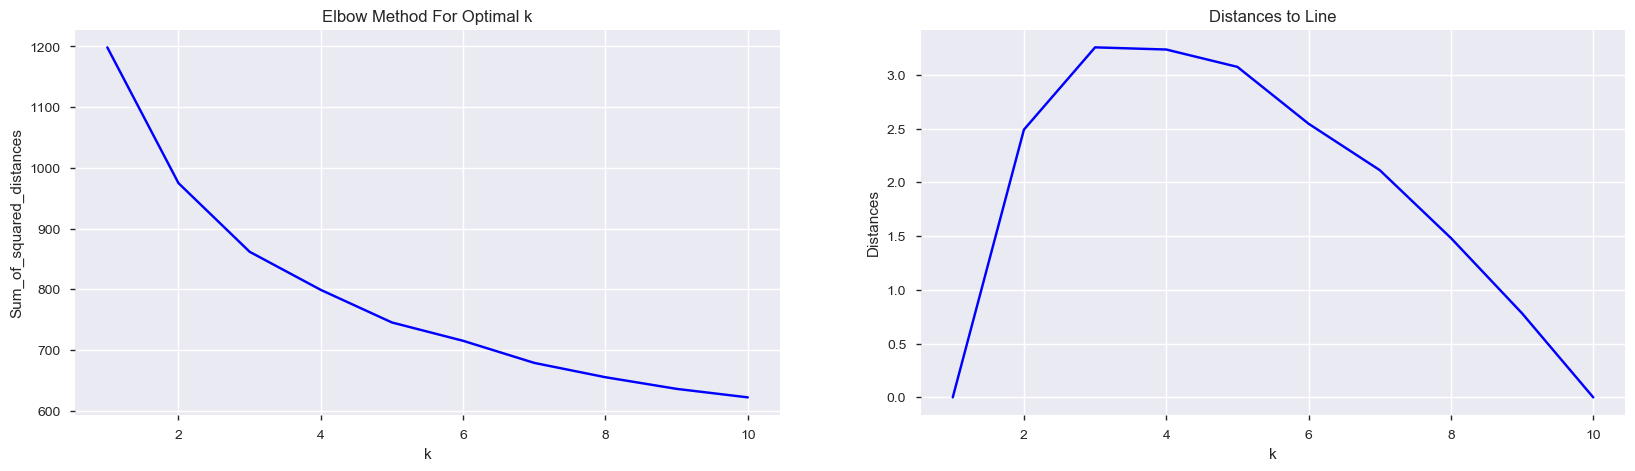

(278, 29)

In [96]:
claster_df = get_clusters(pd.DataFrame(X),
                 df_tsne)
claster_df.shape

In [97]:
claster_df.label.value_counts()

1    120
0    113
2     45
Name: label, dtype: int64

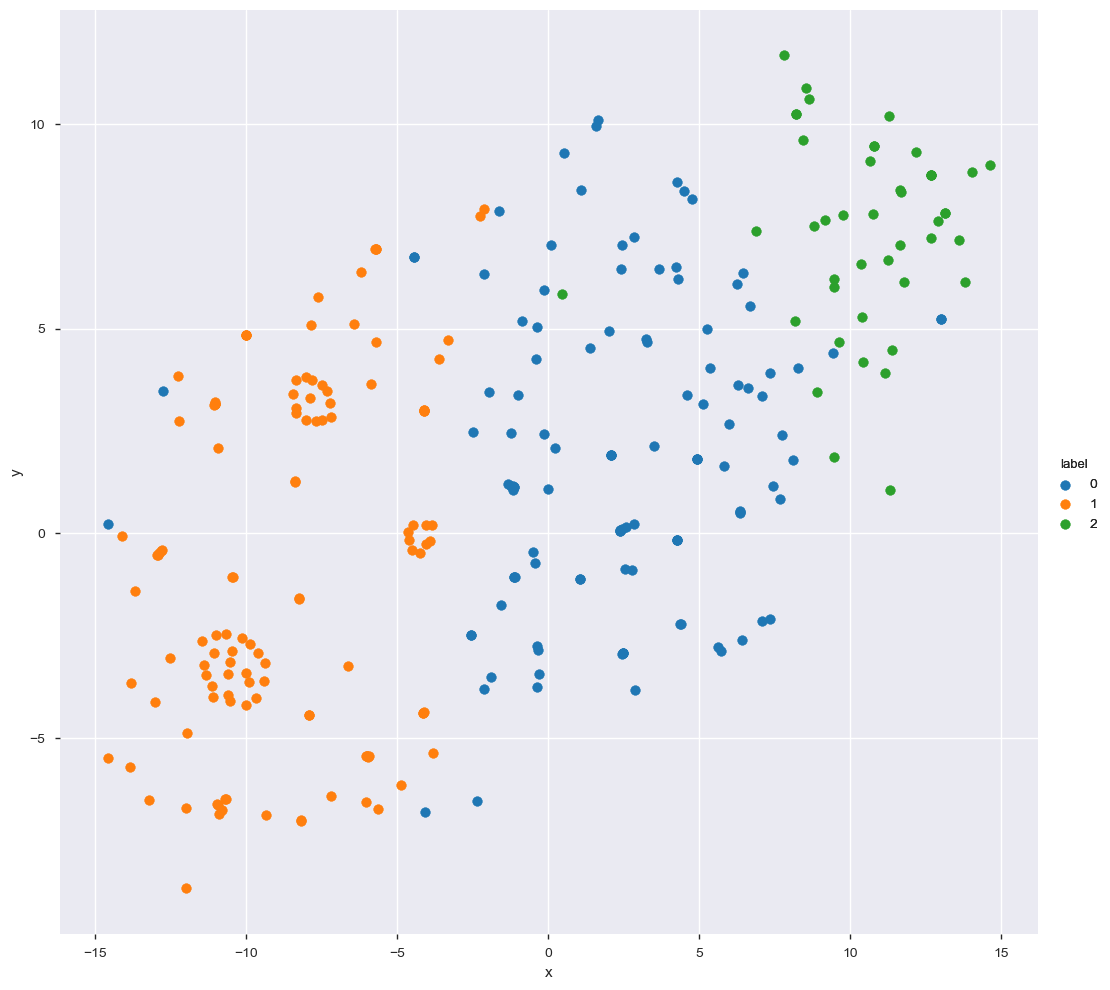

In [98]:
facet = sns.lmplot(data=claster_df, x='x', y='y', hue='label',
                           fit_reg=False, legend=True, height=10, scatter_kws={'alpha': 0.3})

g = (facet.map(plt.scatter, 'x', 'y')
     .add_legend())

plt.show()

# Data Visualization

In [100]:
data_clear.columns

Index(['Sex', 'Age', 'mariage', 'military_duration', 'conflict_duration',
       'injuries', 'rehabilitation_duration', 'T-anxiety', 'S-anxiety', 'PF',
       'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH', 'mariage_cat_1',
       'mariage_cat_2', 'mariage_cat_3', 'mariage_cat_4', 'mariage_cat_5',
       'PF_cat_low', 'PF_cat_mid', 'PF_cat_high', 'RP_cat_low', 'RP_cat_mid',
       'RP_cat_high', 'BP_cat_low', 'BP_cat_mid', 'BP_cat_high', 'GH_cat_low',
       'GH_cat_mid', 'GH_cat_high', 'VT_cat_low', 'VT_cat_mid', 'VT_cat_high',
       'SF_cat_low', 'SF_cat_mid', 'SF_cat_high', 'RE_cat_low', 'RE_cat_mid',
       'RE_cat_high', 'MH_cat_low', 'MH_cat_mid', 'MH_cat_high'],
      dtype='object')

In [101]:
data.dropna().shape, data_clear.shape, claster_df.shape

((278, 28), (278, 46), (278, 29))

In [106]:
data_start_clear = data.dropna()
data_start_clear['clusters'] = claster_df['label'].values
data_clear['clusters'] = claster_df['label'].values
data_clear.columns, data_start_clear.columns

C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(Index(['Sex', 'Age', 'mariage', 'military_duration', 'conflict_duration',
        'injuries', 'rehabilitation_duration', 'T-anxiety', 'S-anxiety', 'PF',
        'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH', 'mariage_cat_1',
        'mariage_cat_2', 'mariage_cat_3', 'mariage_cat_4', 'mariage_cat_5',
        'PF_cat_low', 'PF_cat_mid', 'PF_cat_high', 'RP_cat_low', 'RP_cat_mid',
        'RP_cat_high', 'BP_cat_low', 'BP_cat_mid', 'BP_cat_high', 'GH_cat_low',
        'GH_cat_mid', 'GH_cat_high', 'VT_cat_low', 'VT_cat_mid', 'VT_cat_high',
        'SF_cat_low', 'SF_cat_mid', 'SF_cat_high', 'RE_cat_low', 'RE_cat_mid',
        'RE_cat_high', 'MH_cat_low', 'MH_cat_mid', 'MH_cat_high', 'clusters'],
       dtype='object'),
 Index(['Sex', 'Age', 'education', 'mariage', 'military_duration',
        'conflict_duration', 'injuries', 'rehabilitation_duration', 'T-anxiety',
        'S-anxiety', 'university', 'PF', 'RP', 'BP', 'GH', 'VT', 'SF', 'RE',
        'MH', 'mariage_cat', 'PF_cat', 'RP_cat', 'BP_cat'

In [103]:
data_start_clear.to_csv('results.csv', index=False)
data_clear.to_csv('results_clear.csv', index=False)

## Categorics

In [107]:
list(data_start_clear.select_dtypes('category').columns)

['education',
 'university',
 'mariage_cat',
 'PF_cat',
 'RP_cat',
 'BP_cat',
 'GH_cat',
 'VT_cat',
 'SF_cat',
 'RE_cat',
 'MH_cat']

education


clusters,0,1,2
education,,,
1.0,63,81,23
2.0,20,21,6
3.0,7,6,7
4.0,1,0,0
unk,22,12,9


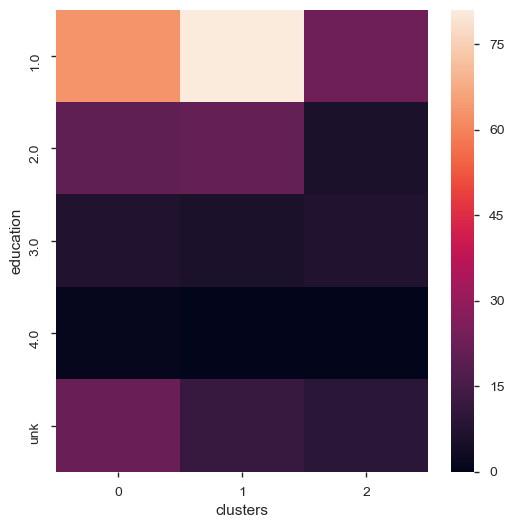

university


clusters,0,1,2
university,,,
1,31,41,19
2,27,13,9
3,31,30,8
4,24,36,9


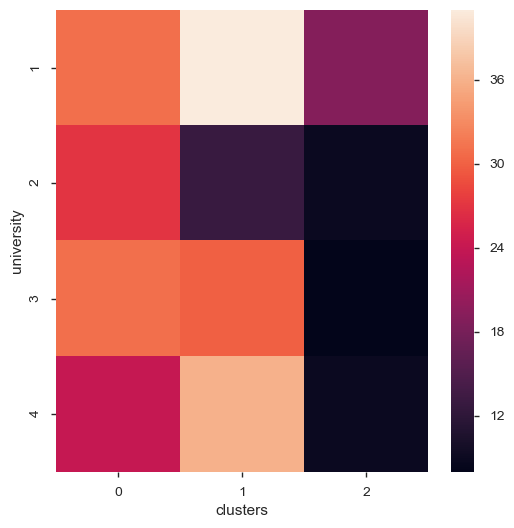

mariage_cat


clusters,0,1,2
mariage_cat,,,
2,3,2,0
3,99,113,37
4,3,1,0
5,8,4,8


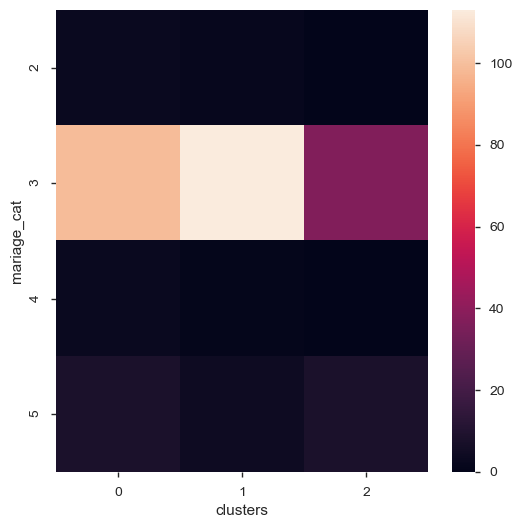

PF_cat


clusters,0,1,2
PF_cat,,,
low,2,0,13
mid,3,0,12
high,108,120,20


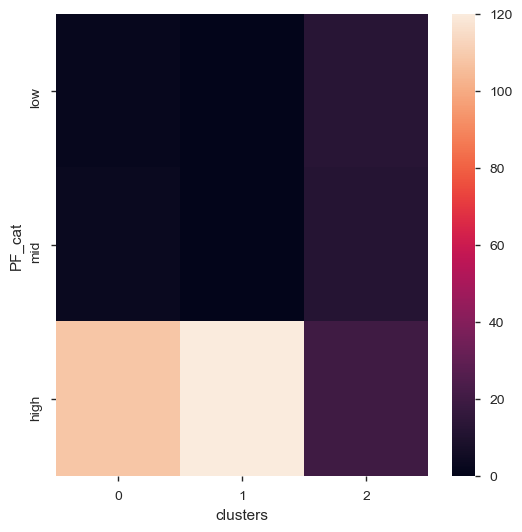

RP_cat


clusters,0,1,2
RP_cat,,,
low,29,13,31
mid,27,19,10
high,57,88,4


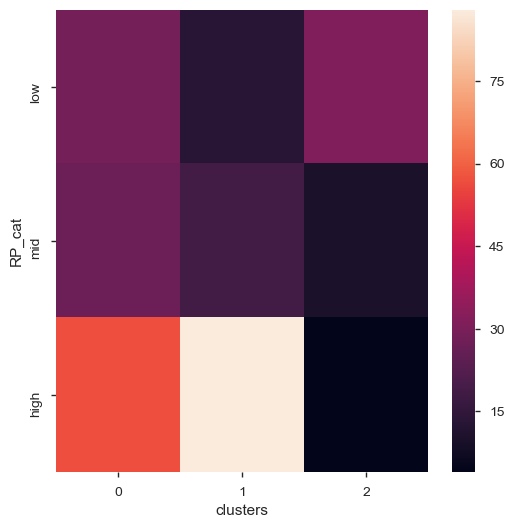

BP_cat


clusters,0,1,2
BP_cat,,,
low,21,5,21
mid,57,20,18
high,35,95,6


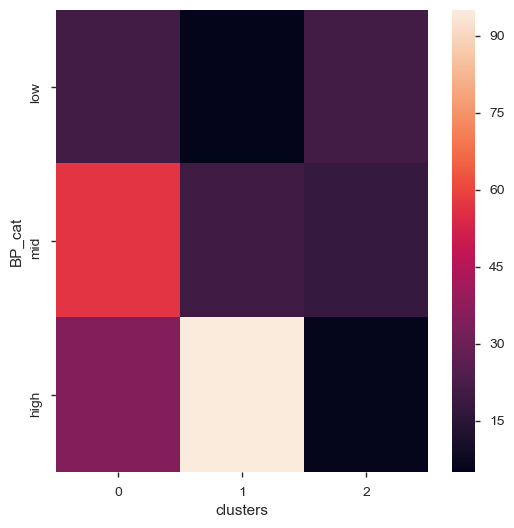

GH_cat


clusters,0,1,2
GH_cat,,,
low,5,6,36
mid,95,24,7
high,13,90,2


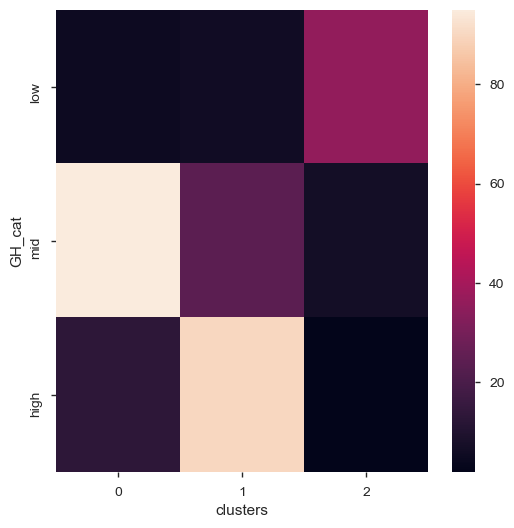

VT_cat


clusters,0,1,2
VT_cat,,,
low,23,2,21
mid,80,52,24
high,10,66,0


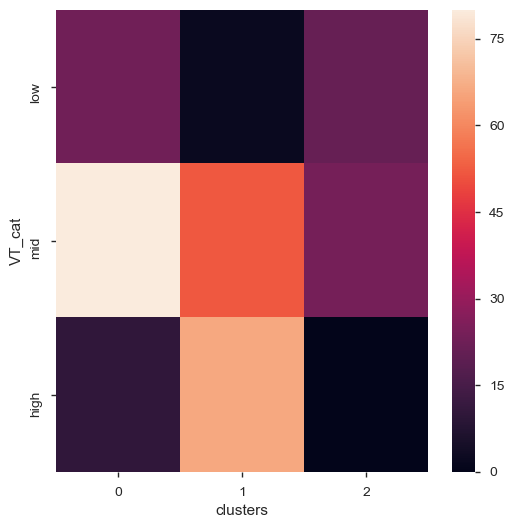

SF_cat


clusters,0,1,2
SF_cat,,,
low,9,2,29
mid,34,6,15
high,70,112,1


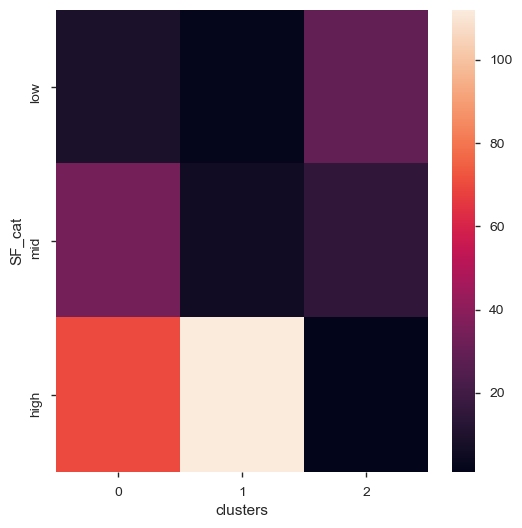

RE_cat


clusters,0,1,2
RE_cat,,,
low,20,9,26
mid,22,8,12
high,71,103,7


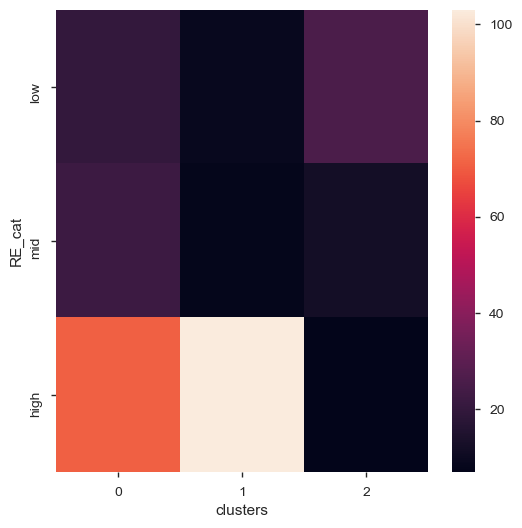

MH_cat


clusters,0,1,2
MH_cat,,,
low,7,2,32
mid,78,9,11
high,28,109,2


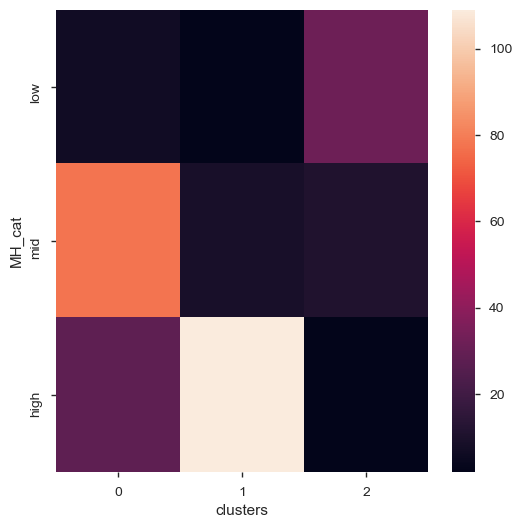

Sex


clusters,0,1,2
Sex,,,
0,97,112,40
1,16,8,5


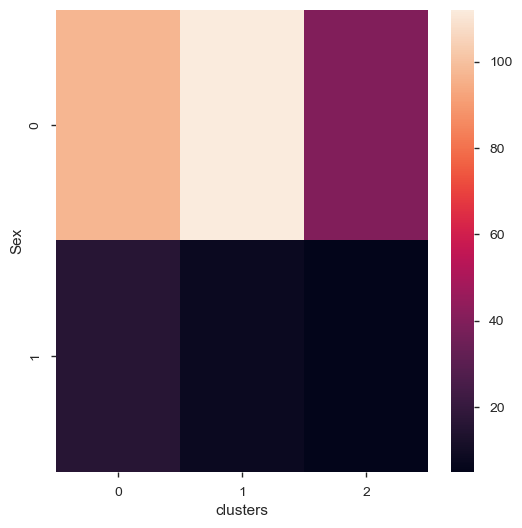

In [109]:
for arg in list(data_start_clear.select_dtypes('category').columns) + ['Sex']:
    print(arg)
    display(HTML(pd.crosstab(data_start_clear[arg], data_start_clear['clusters']).to_html()))
    plt.figure(figsize=(6,6))
    sns.heatmap(pd.crosstab(data_start_clear[arg], data_start_clear['clusters']))
    plt.show()

In [110]:
def subset_by_iqr(df, column, whisker_width=1.5):
    """Remove outliers from a dataframe by column, including optional 
       whiskers, removing rows for which the column value are 
       less than Q1-1.5IQR or greater than Q3+1.5IQR.
    Args:
        df (`:obj:pd.DataFrame`): A pandas dataframe to subset
        column (str): Name of the column to calculate the subset from.
        whisker_width (float): Optional, loosen the IQR filter by a
                               factor of `whisker_width` * IQR.
    Returns:
        (`:obj:pd.DataFrame`): Filtered dataframe
    """
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]                                                     

# Example for whiskers = 1.5, as requested by the OP
# subset_by_iqr(data_start, 'T-anxiety', whisker_width=1.5).groupby('clusters')['T-anxiety'].describe()

Sex
Full Distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,0.141593,0.350185,0.0,0.0,0.0,0.0,1.0
1,120.0,0.066667,0.250490,0.0,0.0,0.0,0.0,1.0
2,45.0,0.111111,0.317821,0.0,0.0,0.0,0.0,1.0


IRQ distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


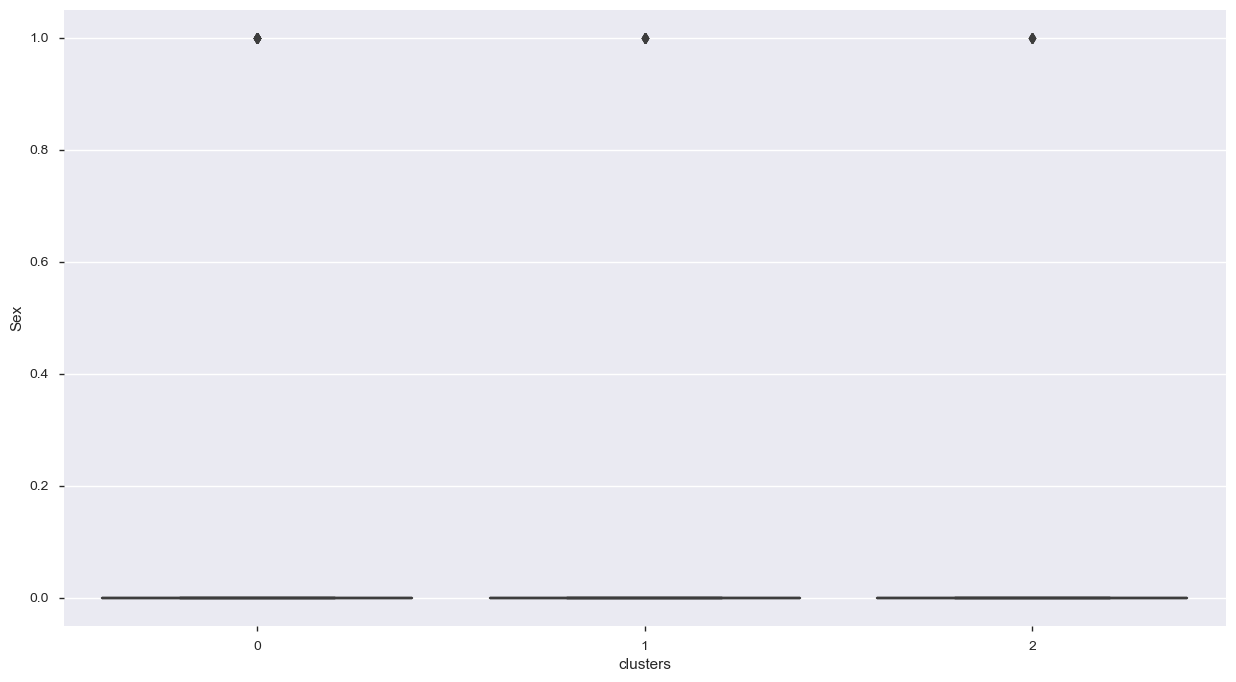

Age
Full Distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,21.185841,4.601142,16.0,19.0,19.0,21.0,41.0
1,120.0,21.308333,3.989052,17.0,19.0,20.0,23.0,43.0
2,45.0,21.311111,4.236327,17.0,19.0,19.0,22.0,35.0


IRQ distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,107.0,20.289720,2.521640,16.0,19.0,19.0,21.0,29.0
1,114.0,20.701754,2.850027,17.0,19.0,20.0,22.0,29.0
2,43.0,20.790698,3.502096,17.0,19.0,19.0,21.0,29.0


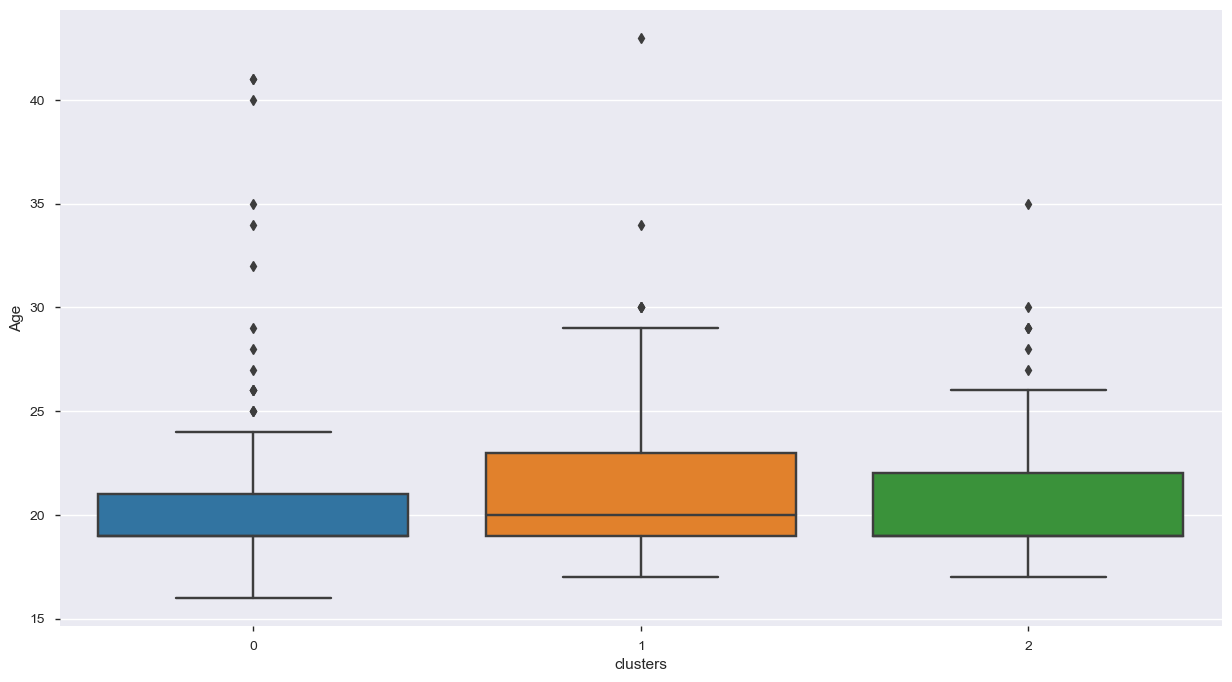

mariage
Full Distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,3.141593,0.564852,2.0,3.0,3.0,3.0,5.0
1,120.0,3.058333,0.395263,2.0,3.0,3.0,3.0,5.0
2,45.0,3.355556,0.773292,3.0,3.0,3.0,3.0,5.0


IRQ distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,99.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
1,113.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
2,37.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0


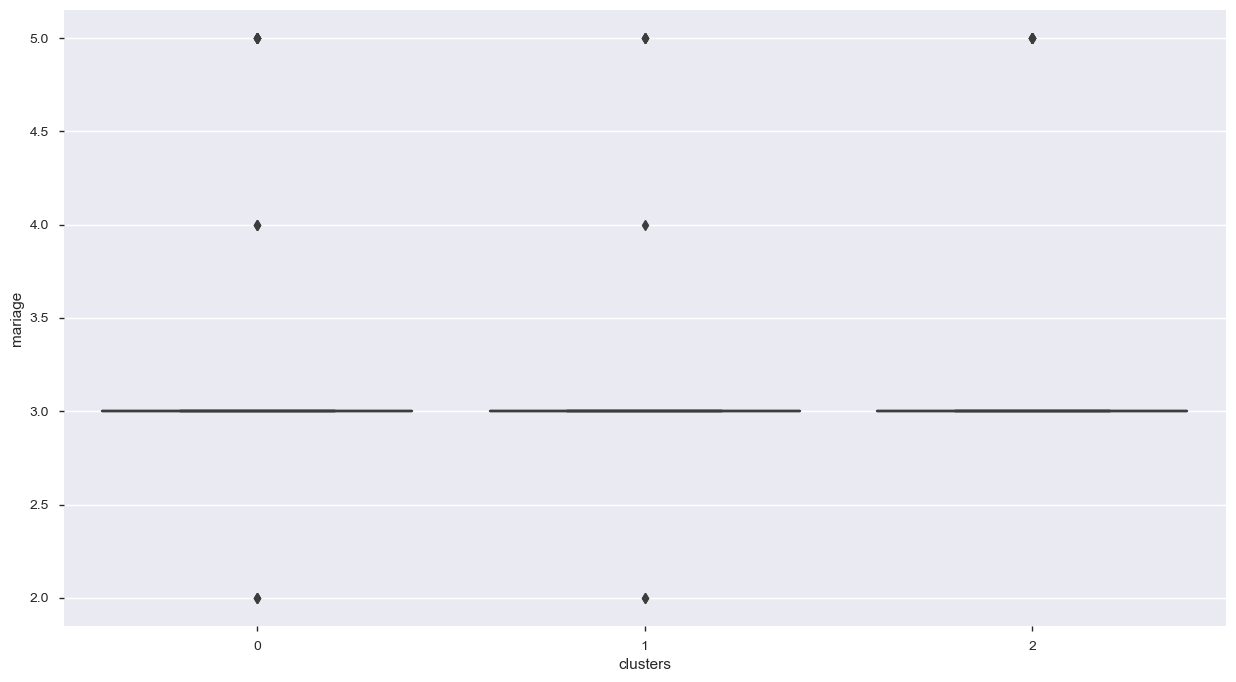

military_duration
Full Distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,23.840708,47.601127,0.0,0.0,0.0,36.0,288.0
1,120.0,26.666667,37.286160,0.0,0.0,12.0,36.0,288.0
2,45.0,22.377778,35.653821,0.0,0.0,0.0,27.0,144.0


IRQ distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,109.0,16.018349,23.126857,0.0,0.0,0.0,36.0,90.0
1,115.0,21.147826,22.430885,0.0,0.0,12.0,36.0,72.0
2,43.0,17.279070,26.944675,0.0,0.0,0.0,15.0,84.0


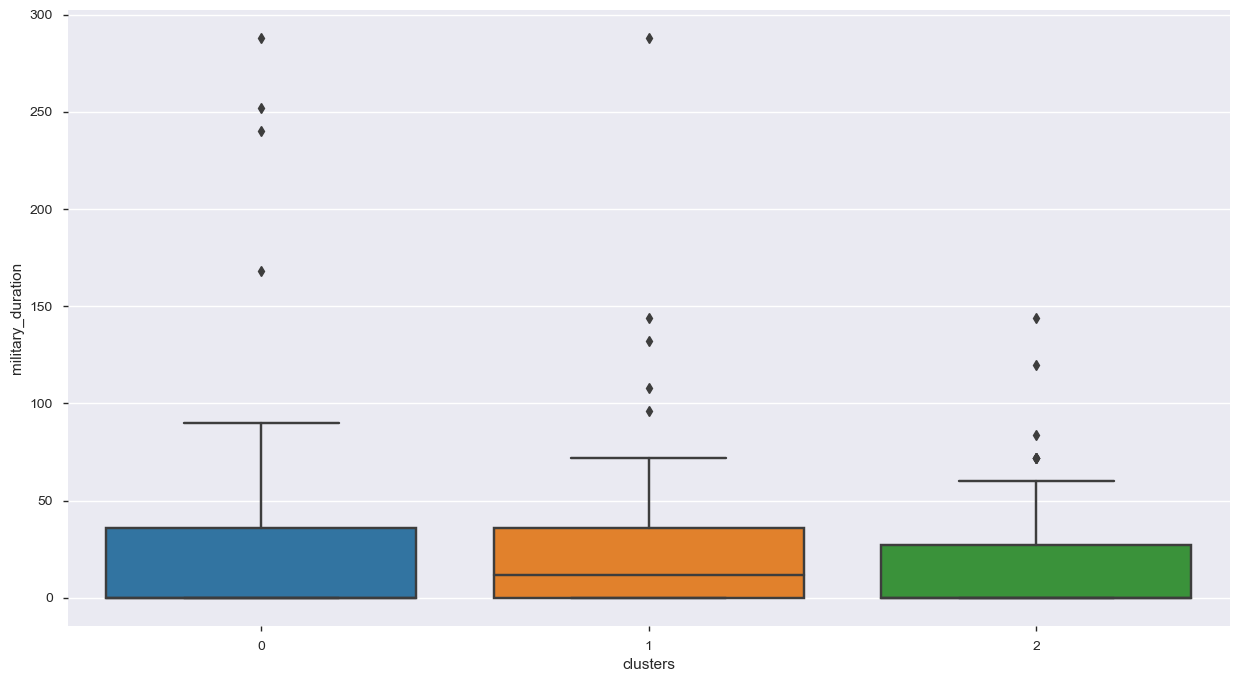

conflict_duration
Full Distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,2.168142,4.529472,0.0,0.0,0.0,3.00,25.0
1,120.0,4.016667,8.293952,0.0,0.0,0.0,5.25,48.0
2,45.0,2.622222,5.262599,0.0,0.0,0.0,4.00,24.0


IRQ distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,105.0,1.152381,2.432872,0.0,0.0,0.0,0.0,10.0
1,103.0,1.349515,2.803040,0.0,0.0,0.0,0.0,10.0
2,42.0,1.380952,2.336898,0.0,0.0,0.0,3.0,8.0


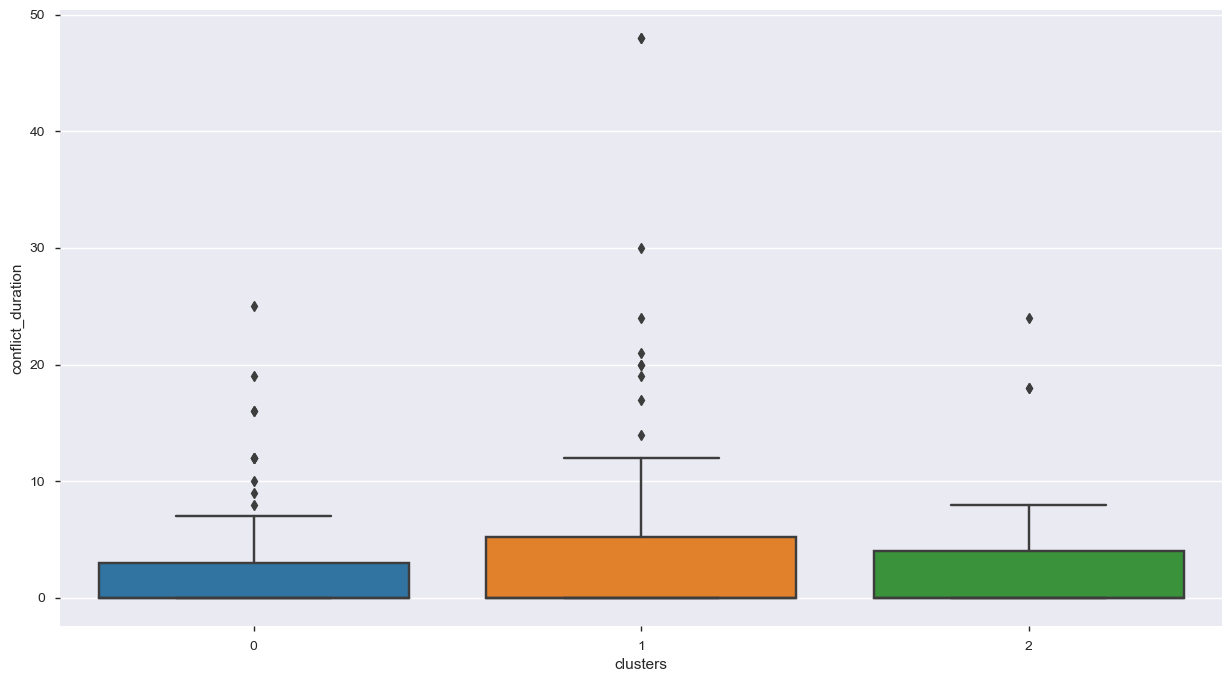

injuries
Full Distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,0.044248,0.206561,0.0,0.0,0.0,0.0,1.0
1,120.0,0.041667,0.200664,0.0,0.0,0.0,0.0,1.0
2,45.0,0.066667,0.252262,0.0,0.0,0.0,0.0,1.0


IRQ distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


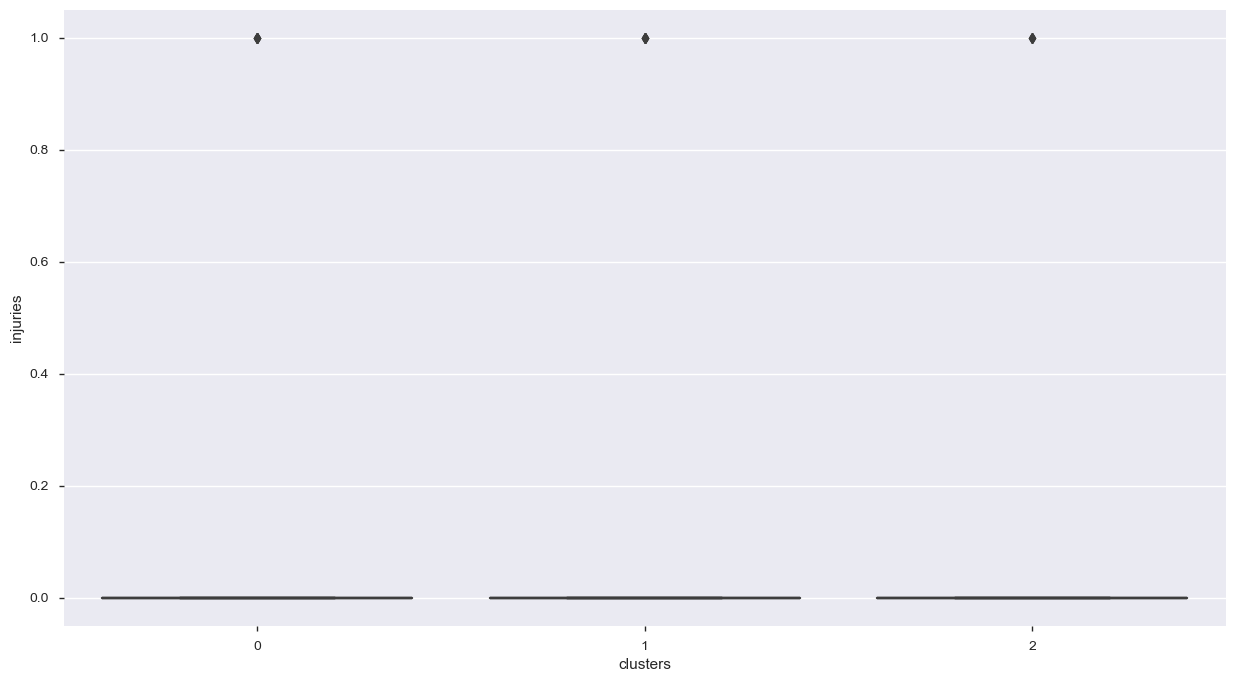

rehabilitation_duration
Full Distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,0.097345,0.516938,0.0,0.0,0.0,0.0,3.0
1,120.0,0.100000,0.571008,0.0,0.0,0.0,0.0,5.0
2,45.0,0.155556,0.601345,0.0,0.0,0.0,0.0,3.0


IRQ distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


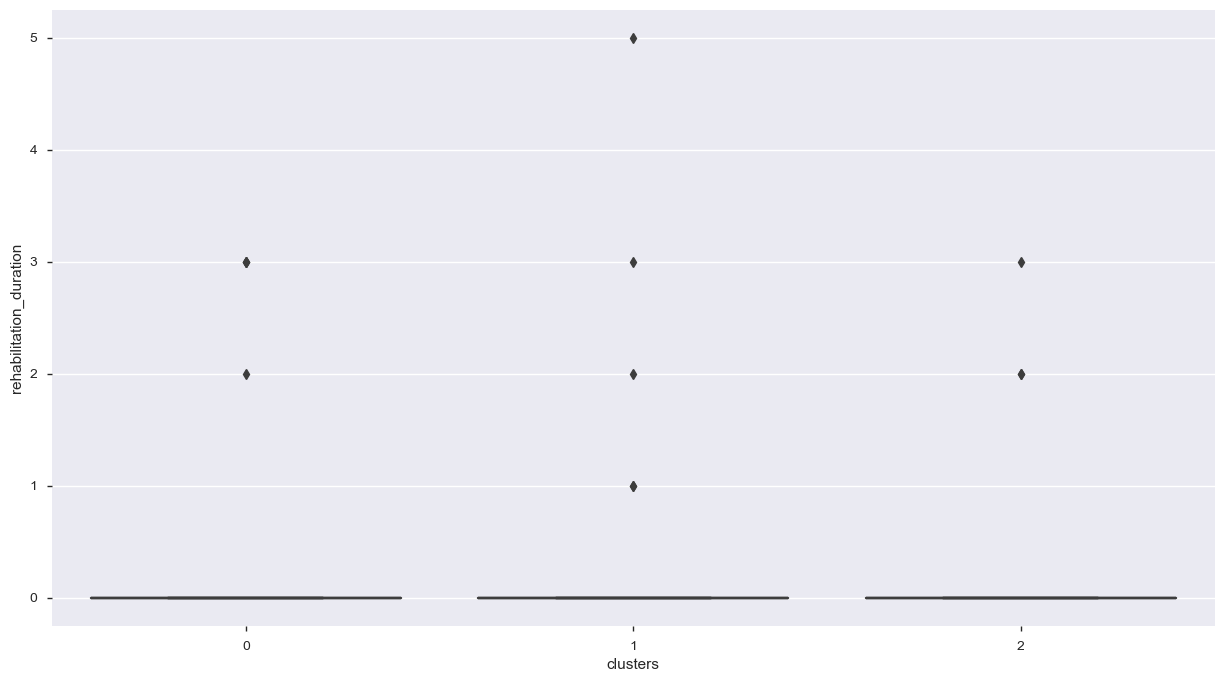

T-anxiety
Full Distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,44.327434,5.933324,33.0,40.0,44.0,48.0,62.0
1,120.0,37.375000,7.459766,23.0,32.0,37.5,43.0,62.0
2,45.0,50.355556,6.644053,32.0,47.0,51.0,54.0,70.0


IRQ distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,44.327434,5.933324,33.0,40.00,44.0,48.0,62.0
1,120.0,37.375000,7.459766,23.0,32.00,37.5,43.0,62.0
2,44.0,49.909091,5.999295,32.0,46.75,51.0,54.0,61.0


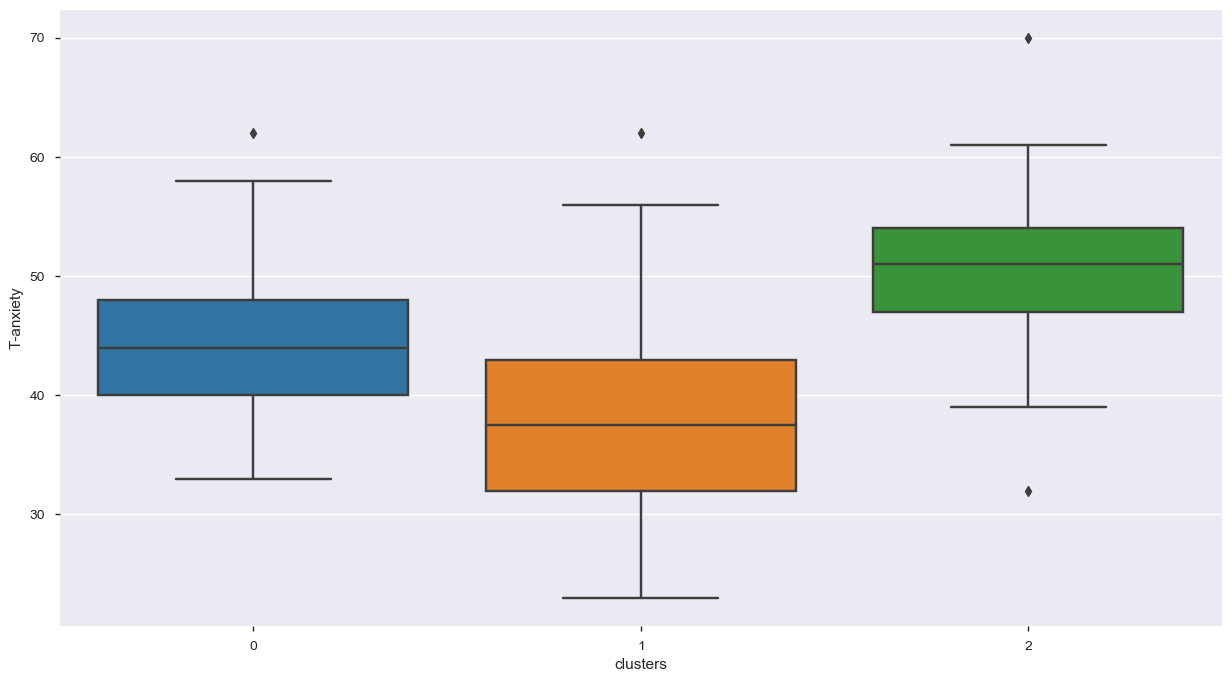

S-anxiety
Full Distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,42.725664,5.934535,25.0,39.0,43.0,47.0,54.0
1,120.0,35.350000,6.689575,20.0,30.0,35.0,40.0,53.0
2,45.0,49.755556,7.268098,31.0,47.0,49.0,55.0,66.0


IRQ distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,42.725664,5.934535,25.0,39.0,43.0,47.0,54.0
1,120.0,35.350000,6.689575,20.0,30.0,35.0,40.0,53.0
2,43.0,49.046512,6.611510,31.0,46.5,49.0,54.5,60.0


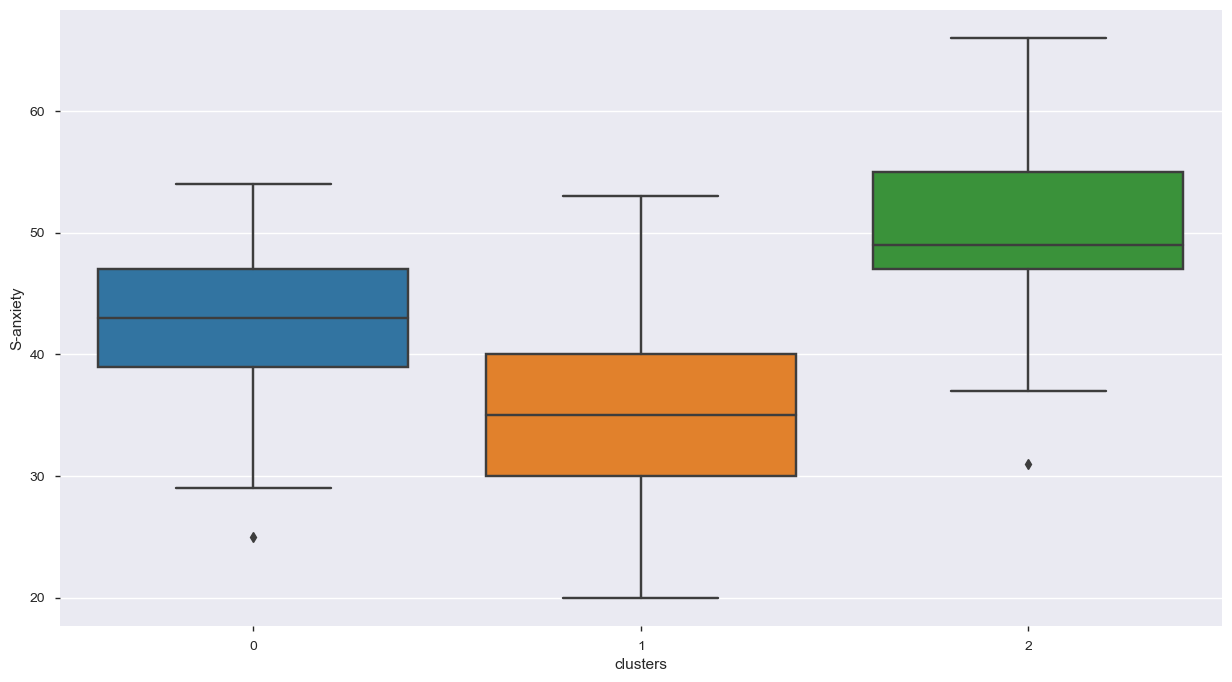

PF
Full Distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,95.398230,9.731704,40.0,95.0,100.0,100.0,100.0
1,120.0,98.416667,3.941981,80.0,100.0,100.0,100.0,100.0
2,45.0,67.444444,28.456950,10.0,45.0,75.0,90.0,100.0


IRQ distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,102.0,97.941176,3.400127,90.0,95.00,100.0,100.00,100.0
1,115.0,99.043478,2.556009,90.0,100.00,100.0,100.00,100.0
2,14.0,95.000000,3.922323,90.0,91.25,95.0,98.75,100.0


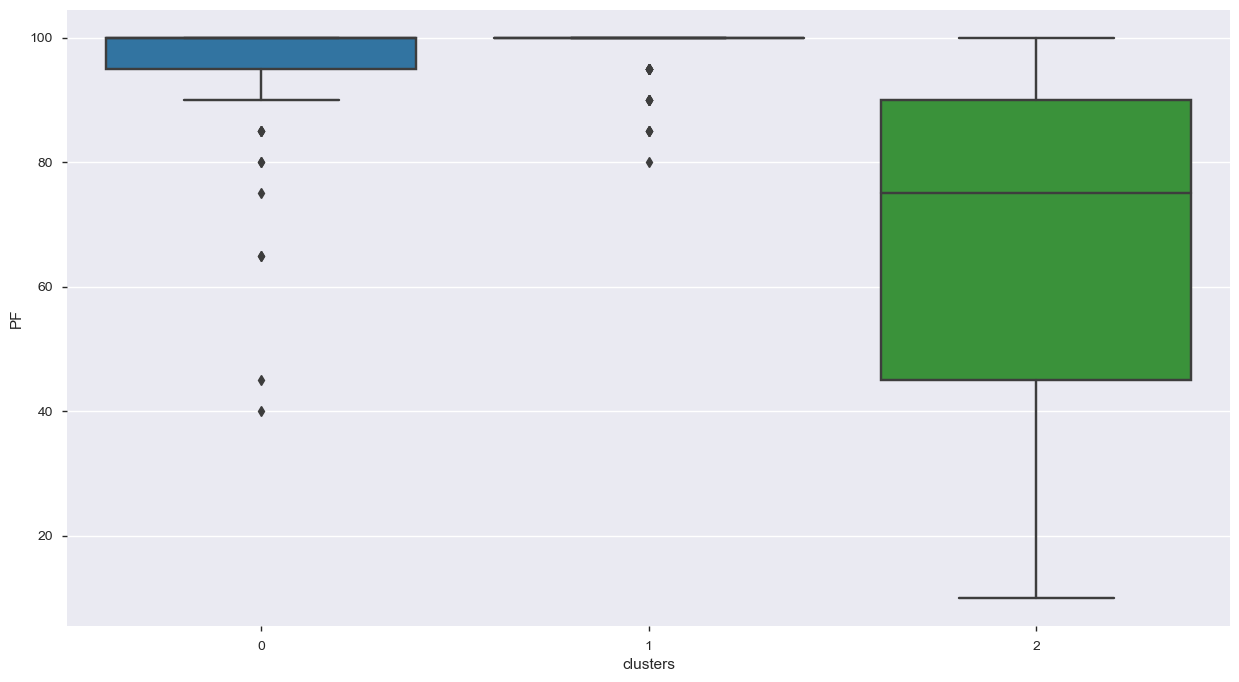

RP
Full Distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,76.991150,29.531610,0.0,50.0,100.0,100.0,100.0
1,120.0,89.583333,19.869145,25.0,75.0,100.0,100.0,100.0
2,45.0,46.111111,28.681022,0.0,25.0,50.0,75.0,100.0


IRQ distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,76.991150,29.531610,0.0,50.0,100.0,100.0,100.0
1,120.0,89.583333,19.869145,25.0,75.0,100.0,100.0,100.0
2,45.0,46.111111,28.681022,0.0,25.0,50.0,75.0,100.0


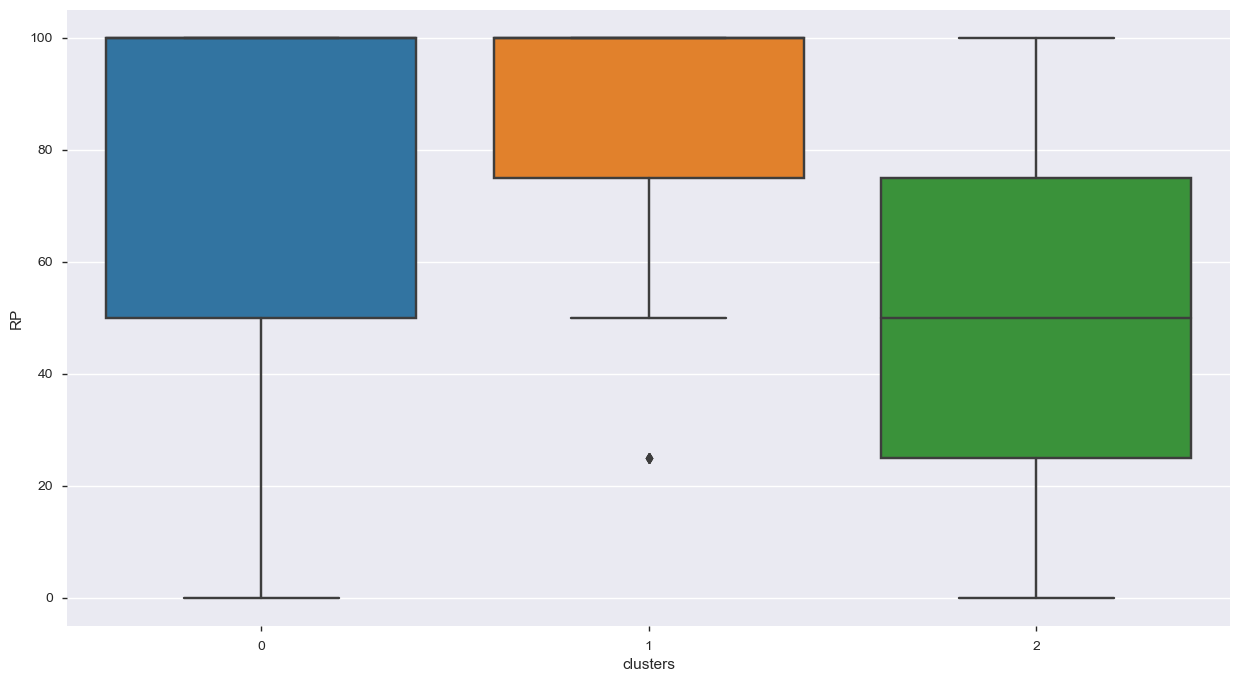

BP
Full Distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,65.637168,20.585649,12.0,52.0,64.0,90.0,90.0
1,120.0,82.766667,15.125099,31.0,90.0,90.0,90.0,90.0
2,45.0,47.333333,24.049192,2.0,31.0,52.0,54.0,90.0


IRQ distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,65.637168,20.585649,12.0,52.0,64.0,90.0,90.0
1,120.0,82.766667,15.125099,31.0,90.0,90.0,90.0,90.0
2,45.0,47.333333,24.049192,2.0,31.0,52.0,54.0,90.0


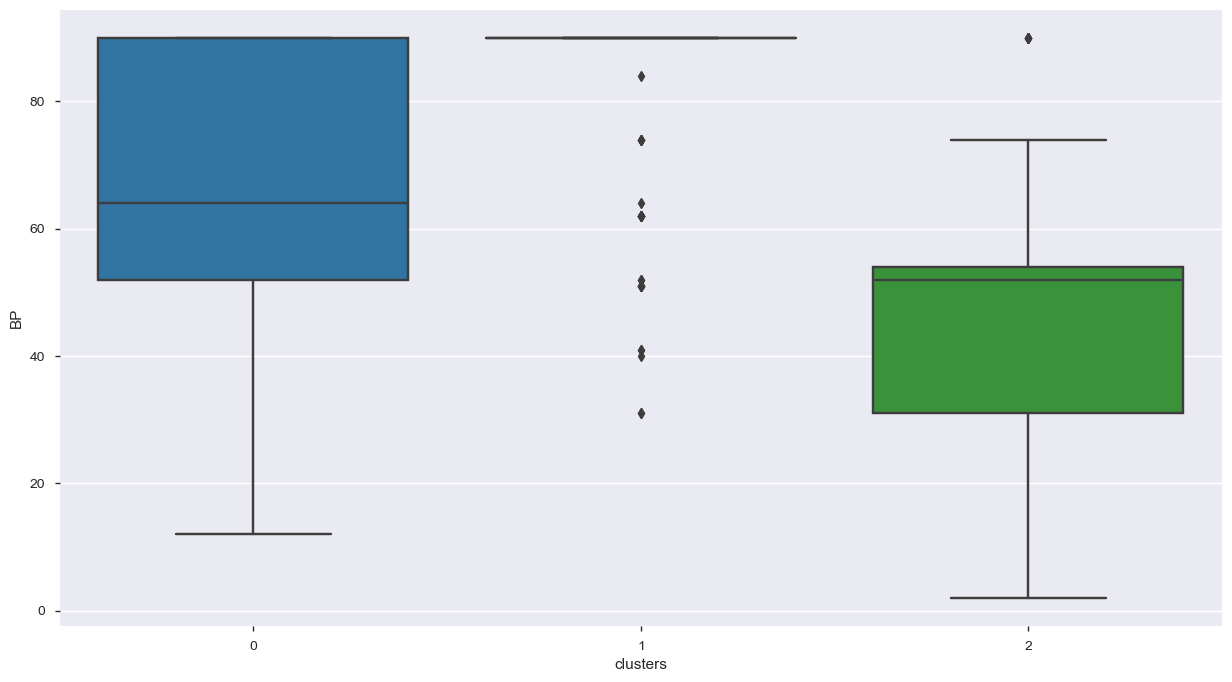

GH
Full Distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,65.407080,10.103604,45.0,57.0,67.0,72.0,97.0
1,120.0,80.516667,14.225662,25.0,76.5,82.0,90.0,100.0
2,45.0,44.444444,13.660753,20.0,35.0,42.0,50.0,82.0


IRQ distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,65.407080,10.103604,45.0,57.0,67.0,72.0,97.0
1,120.0,80.516667,14.225662,25.0,76.5,82.0,90.0,100.0
2,45.0,44.444444,13.660753,20.0,35.0,42.0,50.0,82.0


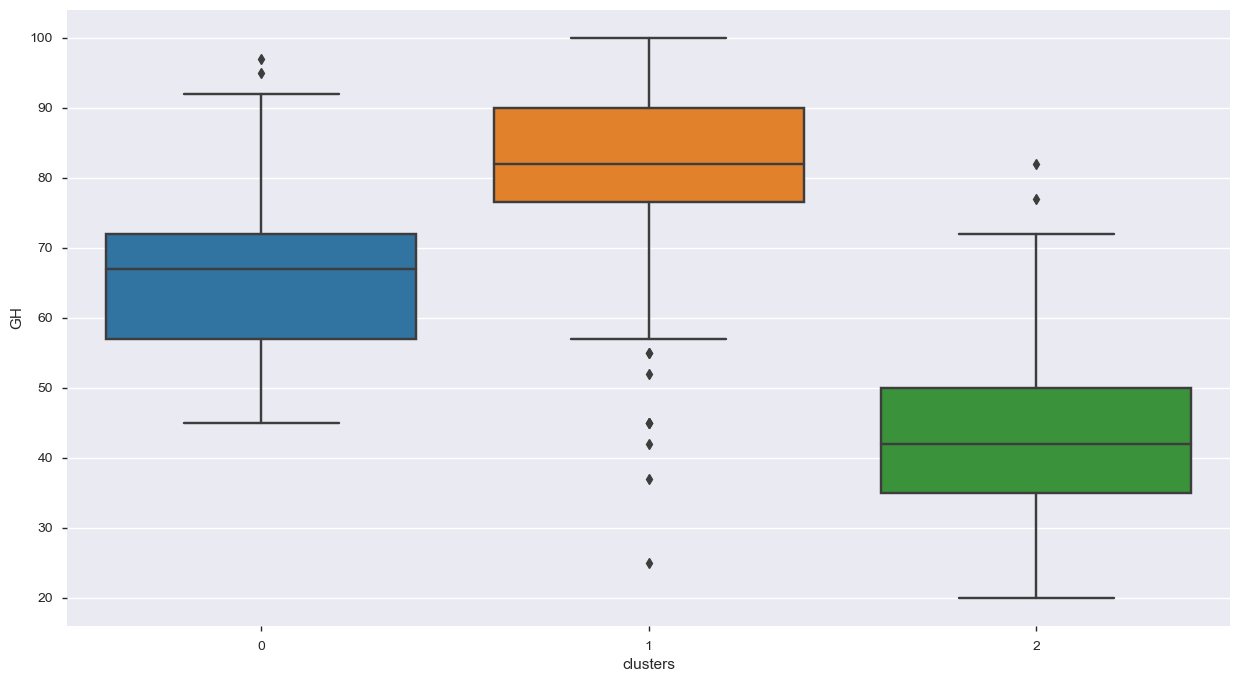

VT
Full Distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,62.035398,13.086886,10.0,55.0,65.0,70.0,90.0
1,120.0,79.375000,12.359505,30.0,70.0,80.0,85.0,100.0
2,45.0,48.666667,15.608855,5.0,40.0,55.0,60.0,75.0


IRQ distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,111.0,62.837838,11.689576,30.0,55.0,65.0,70.0,90.0
1,120.0,79.375000,12.359505,30.0,70.0,80.0,85.0,100.0
2,42.0,51.071429,12.950926,30.0,40.0,55.0,60.0,75.0


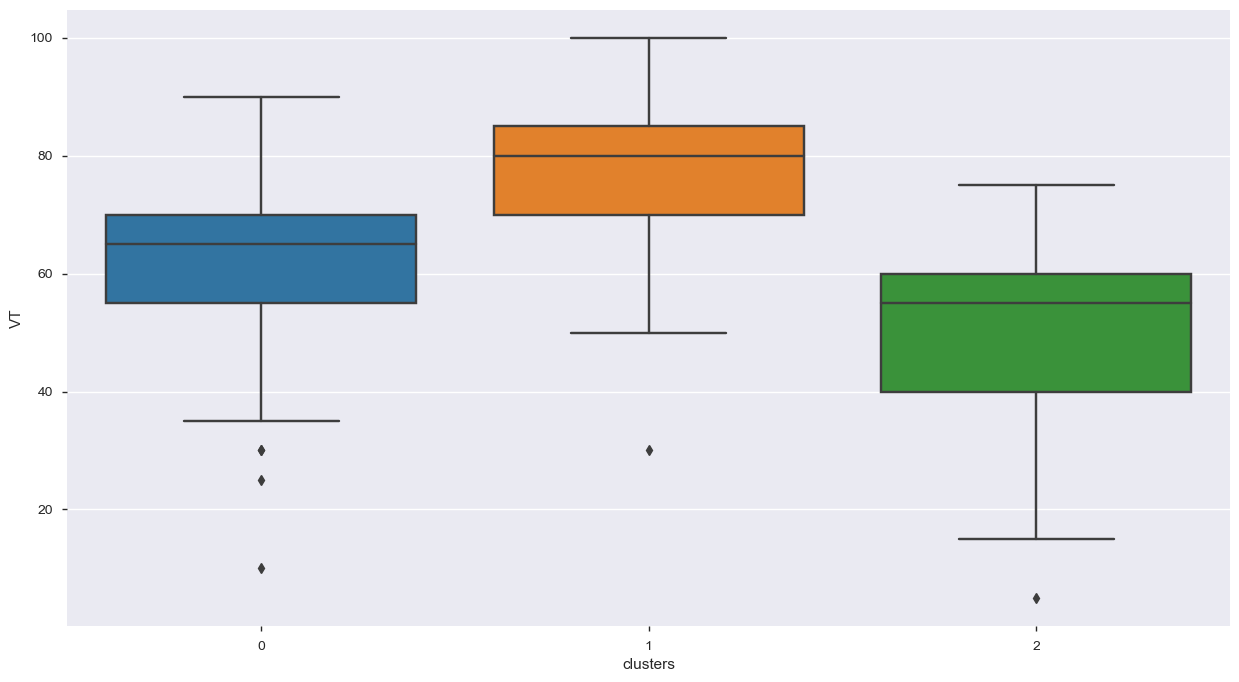

SF
Full Distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,83.296460,16.587382,37.5,75.000,87.5,100.0,100.0
1,120.0,95.416667,9.714049,50.0,96.875,100.0,100.0,100.0
2,45.0,50.555556,17.668739,25.0,37.500,50.0,62.5,100.0


IRQ distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,83.296460,16.587382,37.5,75.000,87.5,100.0,100.0
1,120.0,95.416667,9.714049,50.0,96.875,100.0,100.0,100.0
2,39.0,54.487179,15.572195,37.5,37.500,50.0,62.5,100.0


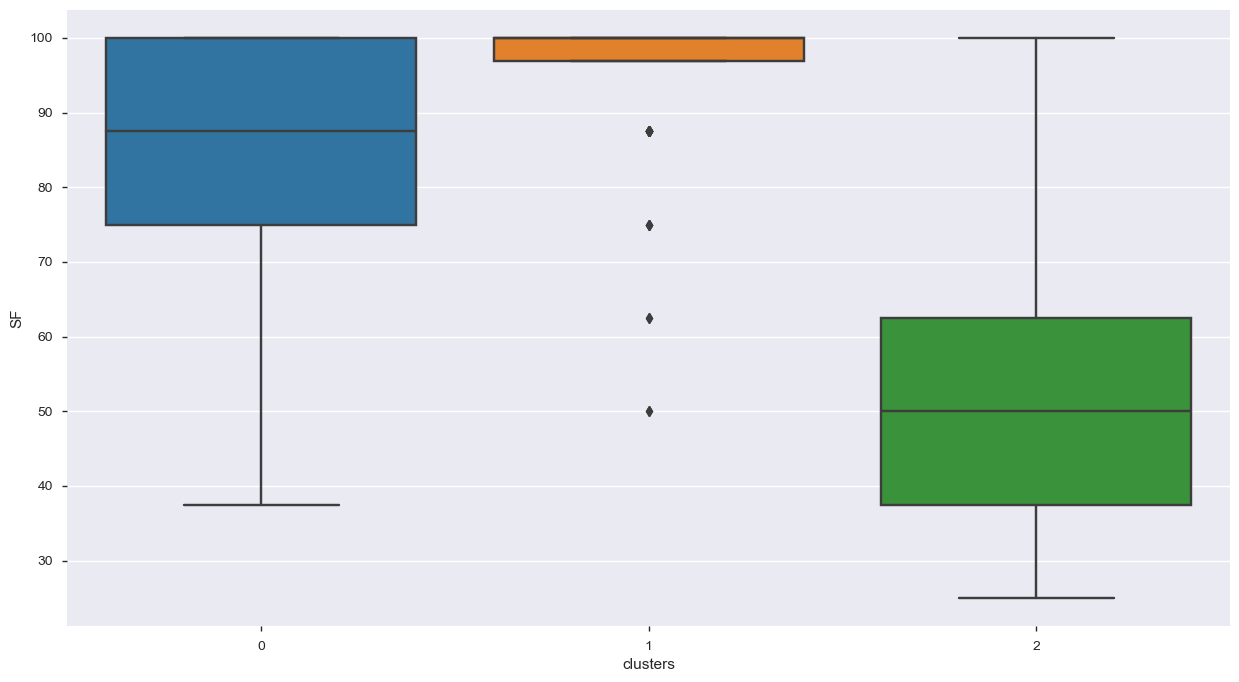

RE
Full Distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,78.761062,32.447133,0.0,66.66667,100.00000,100.00000,100.0
1,120.0,92.500000,20.019832,0.0,100.00000,100.00000,100.00000,100.0
2,45.0,43.703704,34.686346,0.0,0.00000,33.33333,66.66667,100.0


IRQ distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,103.0,86.407767,22.109301,33.33333,66.66667,100.00000,100.00000,100.0
1,119.0,93.277311,18.195337,33.33333,100.00000,100.00000,100.00000,100.0
2,33.0,59.595959,26.030934,33.33333,33.33333,66.66667,66.66667,100.0


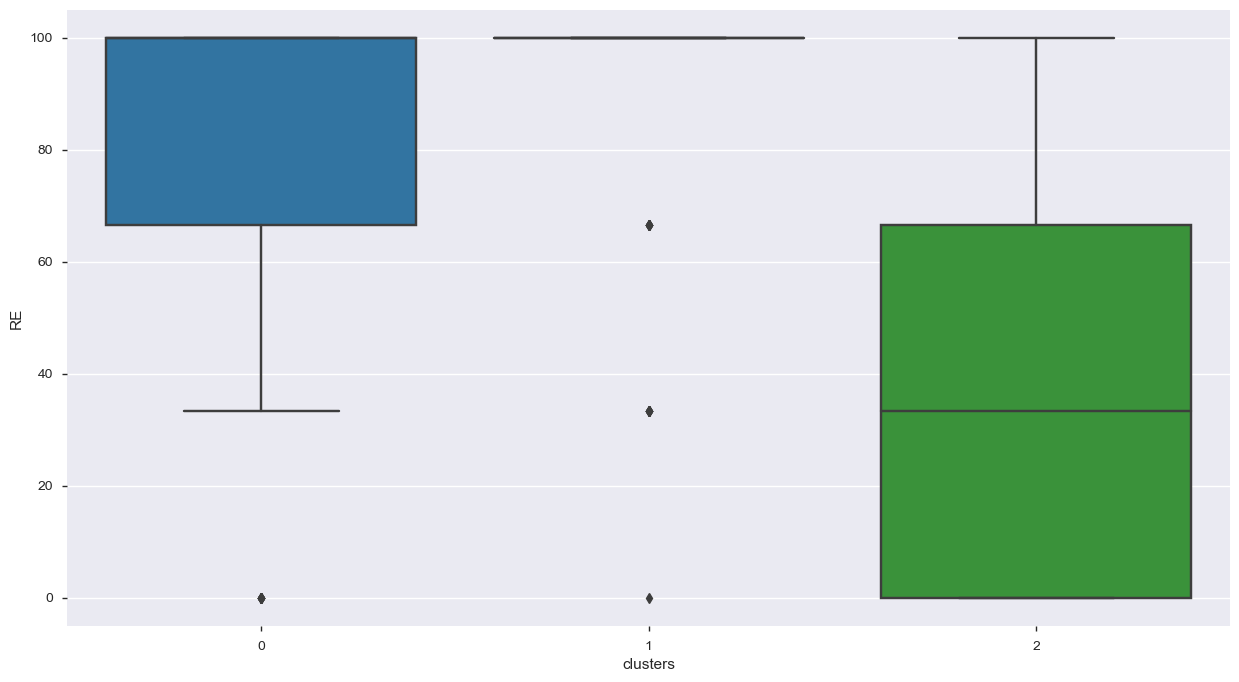

MH
Full Distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,113.0,66.407080,12.845675,0.0,60.0,68.0,72.0,92.0
1,120.0,83.166667,10.120562,44.0,76.0,84.0,88.0,100.0
2,45.0,47.555556,11.946006,24.0,44.0,48.0,52.0,76.0


IRQ distribution:


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,112.0,67.000000,11.243416,28.0,60.0,68.0,73.0,92.0
1,120.0,83.166667,10.120562,44.0,76.0,84.0,88.0,100.0
2,45.0,47.555556,11.946006,24.0,44.0,48.0,52.0,76.0


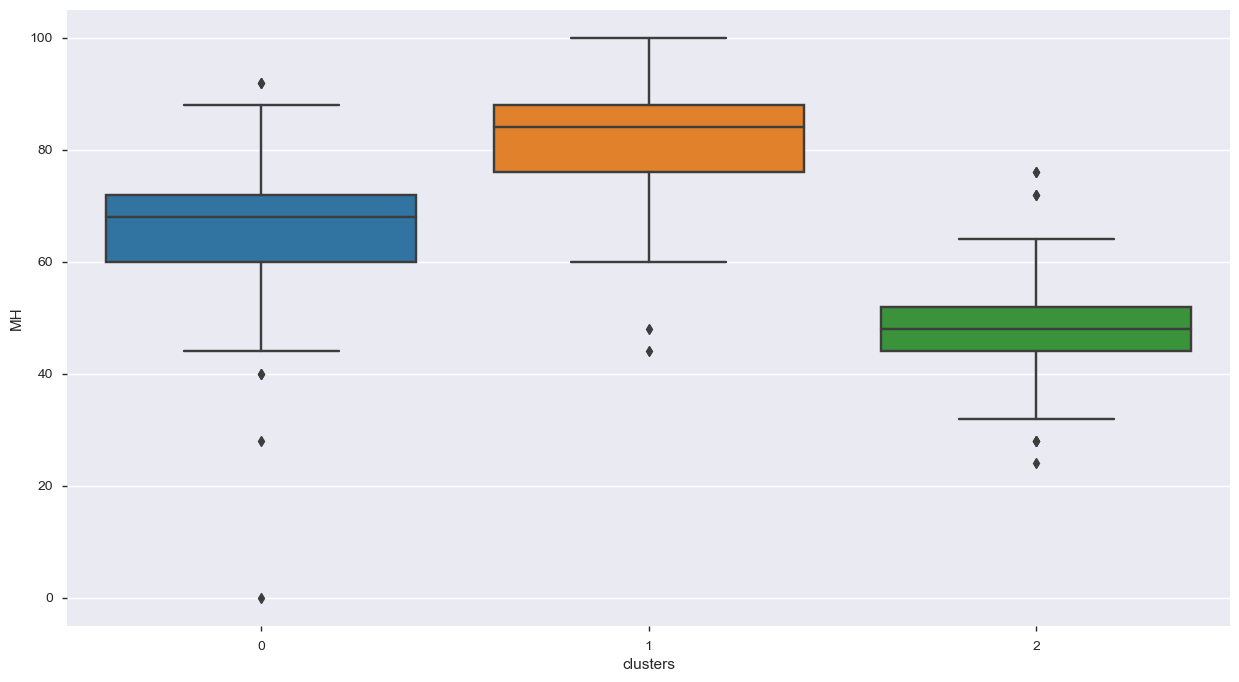

In [111]:
for arg in numeric_columns:
    print(arg)
    print('Full Distribution:')
    display(HTML(data_start_clear.groupby('clusters')[arg].describe().to_html()))
    print('IRQ distribution:')
    display(HTML(subset_by_iqr(data_start_clear, arg, whisker_width=1.5
                              ).groupby('clusters')[arg].describe().to_html()))
    plt.figure(figsize=(15,8))
    sns.boxplot(x='clusters', y=arg, data=data_start_clear)
    plt.show()

# Classification

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import itertools



def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True,
                         figsize=(8, 6)):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """


    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.2 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
    
    
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler


se = StandardScaler()
mms = MinMaxScaler()

In [113]:
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 423
Data columns (total 47 columns):
Sex                        278 non-null int64
Age                        278 non-null int64
mariage                    278 non-null int32
military_duration          278 non-null int64
conflict_duration          278 non-null float64
injuries                   278 non-null int32
rehabilitation_duration    278 non-null int64
T-anxiety                  278 non-null float64
S-anxiety                  278 non-null float64
PF                         278 non-null float64
RP                         278 non-null float64
BP                         278 non-null float64
GH                         278 non-null float64
VT                         278 non-null float64
SF                         278 non-null float64
RE                         278 non-null float64
MH                         278 non-null float64
mariage_cat_1              278 non-null uint8
mariage_cat_2              278 non-null uint8

In [114]:
train = data_clear.drop('clusters', axis=1)#.fillna(0)
target = claster_df['label'].values
train.shape, len(target), train.columns

((278, 46),
 278,
 Index(['Sex', 'Age', 'mariage', 'military_duration', 'conflict_duration',
        'injuries', 'rehabilitation_duration', 'T-anxiety', 'S-anxiety', 'PF',
        'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH', 'mariage_cat_1',
        'mariage_cat_2', 'mariage_cat_3', 'mariage_cat_4', 'mariage_cat_5',
        'PF_cat_low', 'PF_cat_mid', 'PF_cat_high', 'RP_cat_low', 'RP_cat_mid',
        'RP_cat_high', 'BP_cat_low', 'BP_cat_mid', 'BP_cat_high', 'GH_cat_low',
        'GH_cat_mid', 'GH_cat_high', 'VT_cat_low', 'VT_cat_mid', 'VT_cat_high',
        'SF_cat_low', 'SF_cat_mid', 'SF_cat_high', 'RE_cat_low', 'RE_cat_mid',
        'RE_cat_high', 'MH_cat_low', 'MH_cat_mid', 'MH_cat_high'],
       dtype='object'))

C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

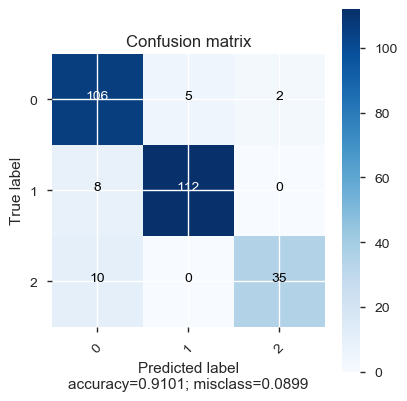

In [115]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error

preds = cross_val_predict(RandomForestClassifier(n_jobs=-1), train, target, cv=5)
plot_confusion_matrix(confusion_matrix(target, preds),
                      sorted(np.unique(target)),
                      figsize=(4, 4), normalize=False,
                     )

## Importance of all features

C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


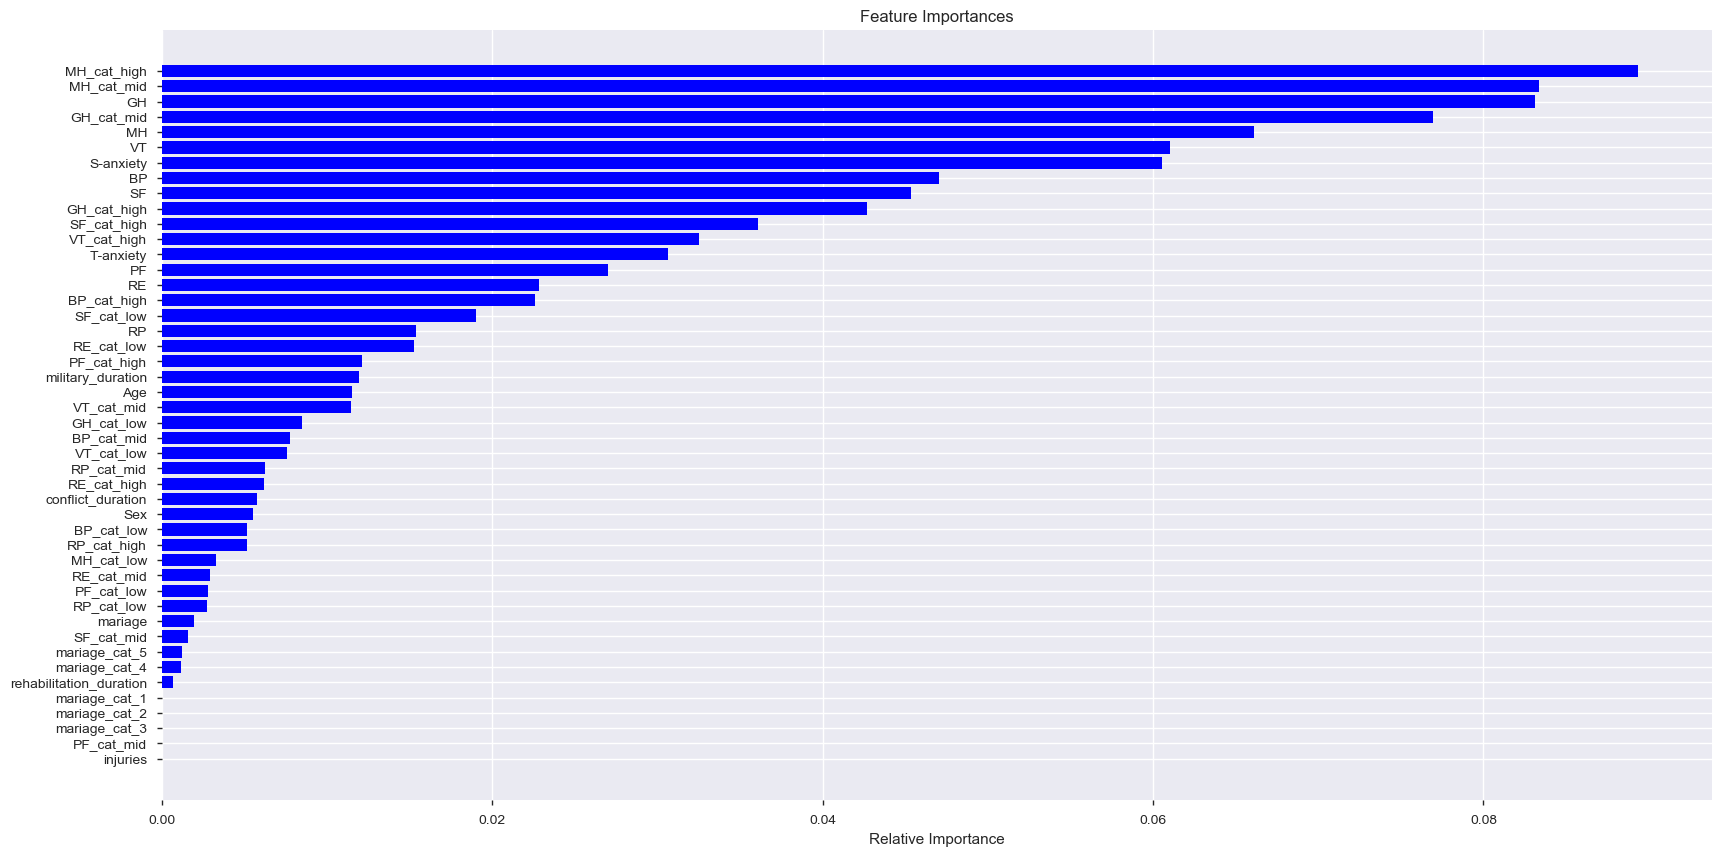

In [116]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(train, target)
columns_order = train.columns

importances = rf.feature_importances_
indices = np.argsort(importances)

fig = plt.figure(figsize=(20,10))

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [columns_order[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [117]:
train.columns

Index(['Sex', 'Age', 'mariage', 'military_duration', 'conflict_duration',
       'injuries', 'rehabilitation_duration', 'T-anxiety', 'S-anxiety', 'PF',
       'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH', 'mariage_cat_1',
       'mariage_cat_2', 'mariage_cat_3', 'mariage_cat_4', 'mariage_cat_5',
       'PF_cat_low', 'PF_cat_mid', 'PF_cat_high', 'RP_cat_low', 'RP_cat_mid',
       'RP_cat_high', 'BP_cat_low', 'BP_cat_mid', 'BP_cat_high', 'GH_cat_low',
       'GH_cat_mid', 'GH_cat_high', 'VT_cat_low', 'VT_cat_mid', 'VT_cat_high',
       'SF_cat_low', 'SF_cat_mid', 'SF_cat_high', 'RE_cat_low', 'RE_cat_mid',
       'RE_cat_high', 'MH_cat_low', 'MH_cat_mid', 'MH_cat_high'],
      dtype='object')

## Importance of non quality life features features

C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

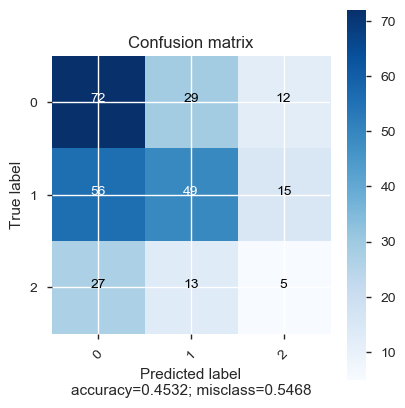

In [126]:
preds = cross_val_predict(RandomForestClassifier(n_jobs=-1), train[['Sex', 'Age', 'mariage', 'military_duration', 'conflict_duration',
       'injuries', 'rehabilitation_duration', 
#                                                                     'T-anxiety', 'S-anxiety', 
                                                                   ]], target, cv=5)

plot_confusion_matrix(confusion_matrix(target, preds),
                      sorted(np.unique(target)),
                      figsize=(4, 4), normalize=False,
                     )

C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


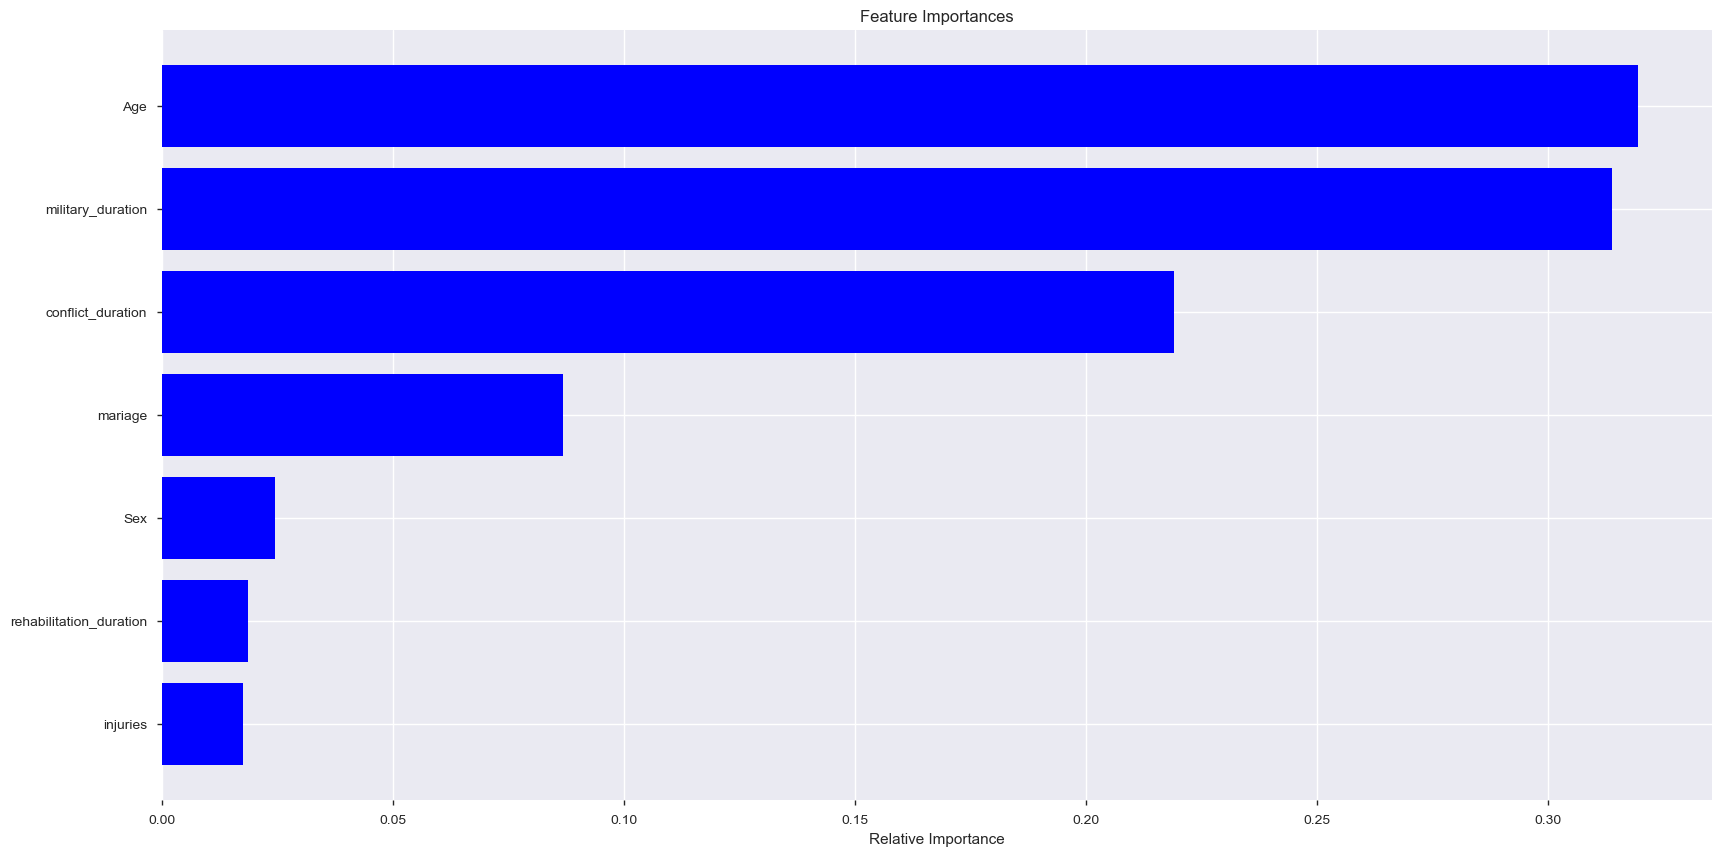

In [128]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(train[['Sex', 'Age', 'mariage', 'military_duration', 'conflict_duration',
       'injuries', 'rehabilitation_duration',
#               'T-anxiety', 'S-anxiety', 
             ]], target)
columns_order = ['Sex', 'Age', 'mariage', 'military_duration', 'conflict_duration',
       'injuries', 'rehabilitation_duration', 
#                  'T-anxiety', 'S-anxiety', 
                ]

importances = rf.feature_importances_
indices = np.argsort(importances)

fig = plt.figure(figsize=(20,10))

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [columns_order[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Importance of quality life features features

C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

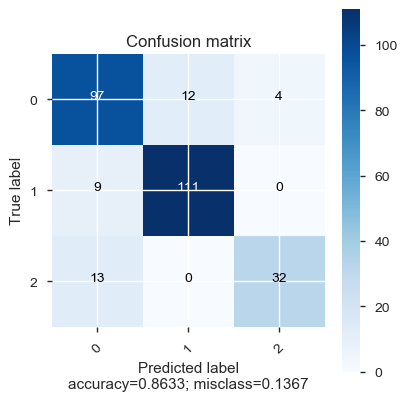

In [120]:
preds = cross_val_predict(RandomForestClassifier(n_jobs=-1), train[['T-anxiety', 'S-anxiety', 'PF',
       'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH']], target, cv=5)
plot_confusion_matrix(confusion_matrix(target, preds),
                      sorted(np.unique(target)),
                      figsize=(4, 4), normalize=False,
                     )

C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


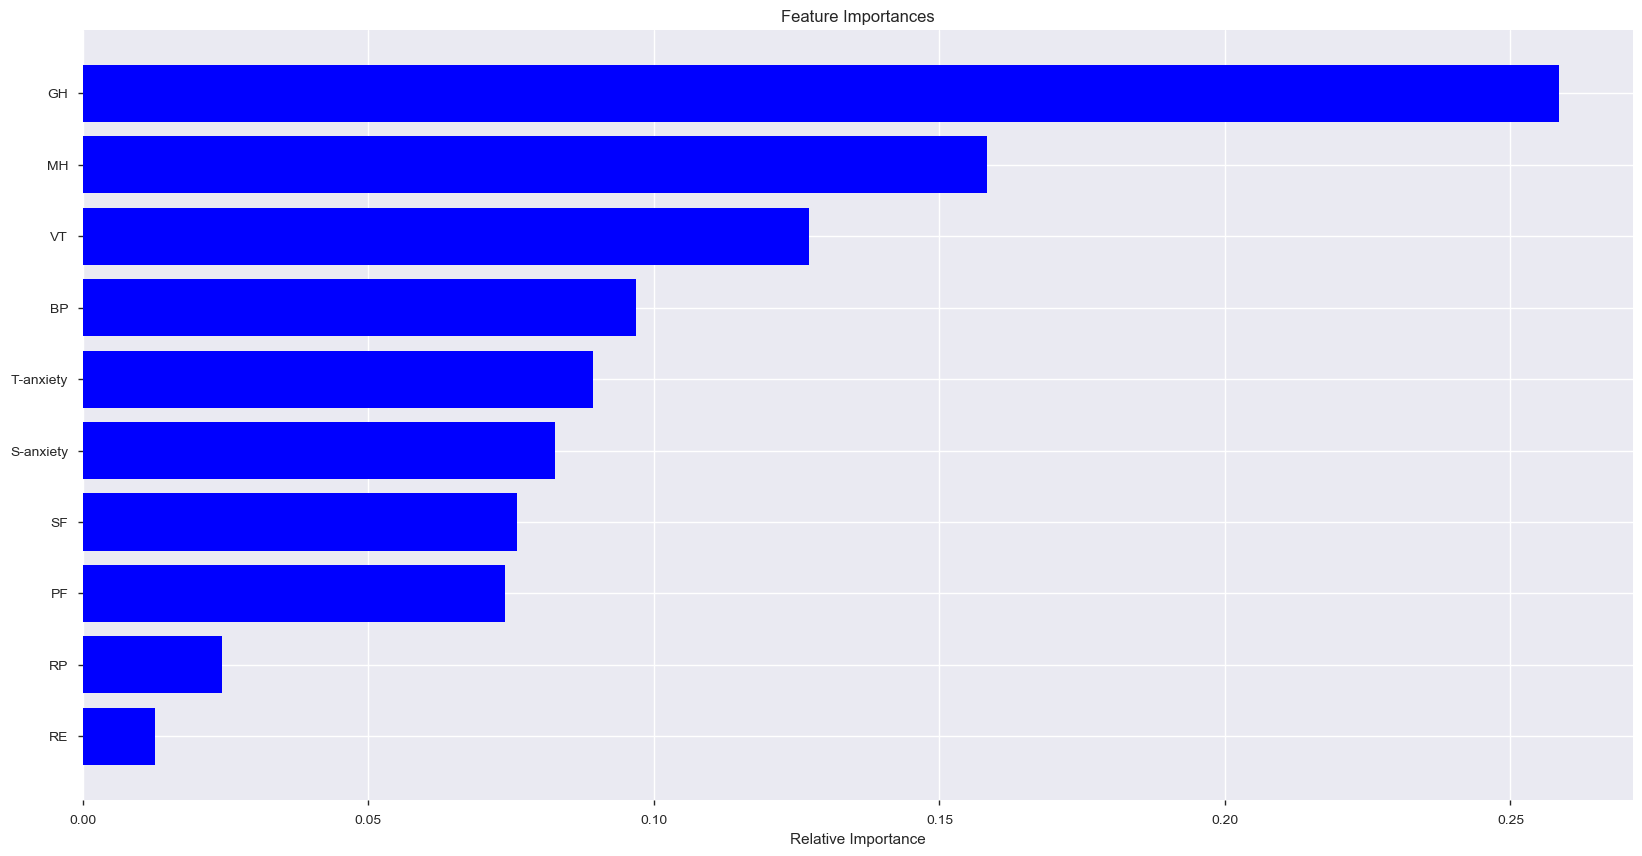

In [121]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(train[['T-anxiety', 'S-anxiety', 'PF',
       'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH']], target)
columns_order = ['T-anxiety', 'S-anxiety', 'PF',
       'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH']

importances = rf.feature_importances_
indices = np.argsort(importances)

fig = plt.figure(figsize=(20,10))

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [columns_order[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Predict T-anxiety based on 'PF', 'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH'

In [122]:
preds = cross_val_predict(RandomForestRegressor(n_jobs=-1), train[['PF',
       'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH']], train['T-anxiety'].values, cv=5)

print('R2 score:', r2_score(train['T-anxiety'].values, preds))
print('RMSE:', np.sqrt(mean_squared_error(train['T-anxiety'].values, preds)))

C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

R2 score: 0.31558867961171144
RMSE: 6.803703259136572


C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


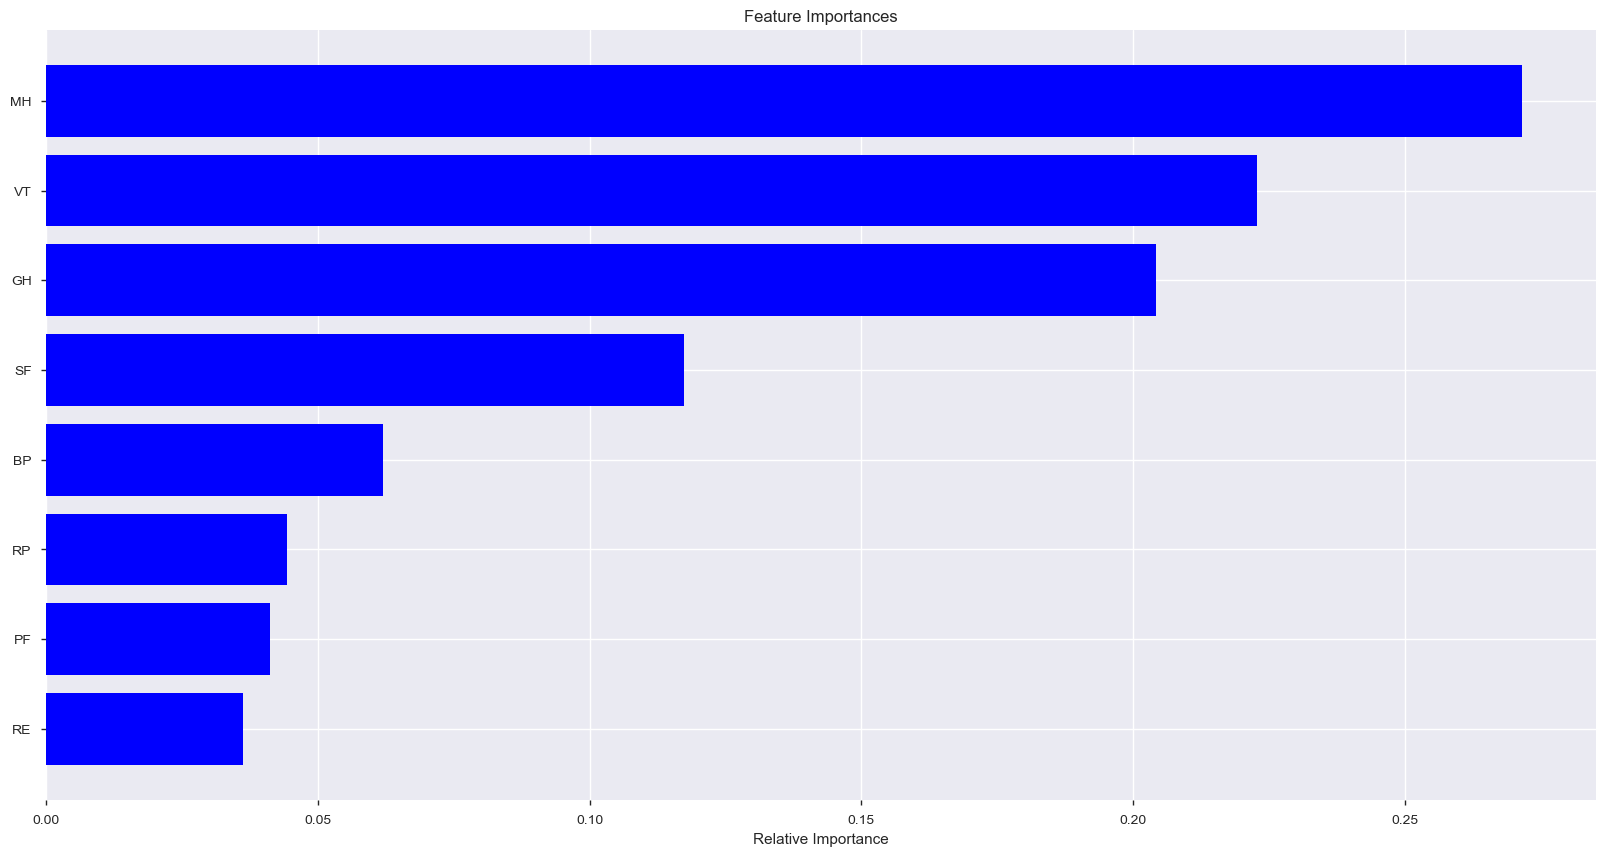

In [123]:
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(train[['PF',
       'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH']], train['T-anxiety'].values)
columns_order = ['PF',
       'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH']

importances = rf.feature_importances_
indices = np.argsort(importances)

fig = plt.figure(figsize=(20,10))

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [columns_order[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Predict S-anxiety based on 'PF', 'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH'

In [124]:
preds = cross_val_predict(RandomForestRegressor(n_jobs=-1), train[['PF',
       'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH']], train['S-anxiety'].values, cv=5)

print('R2 score:', r2_score(train['S-anxiety'].values, preds))
print('RMSE:', np.sqrt(mean_squared_error(train['S-anxiety'].values, preds)))

C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

R2 score: 0.45302368234651547
RMSE: 6.143481410683608


C:\Users\zikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


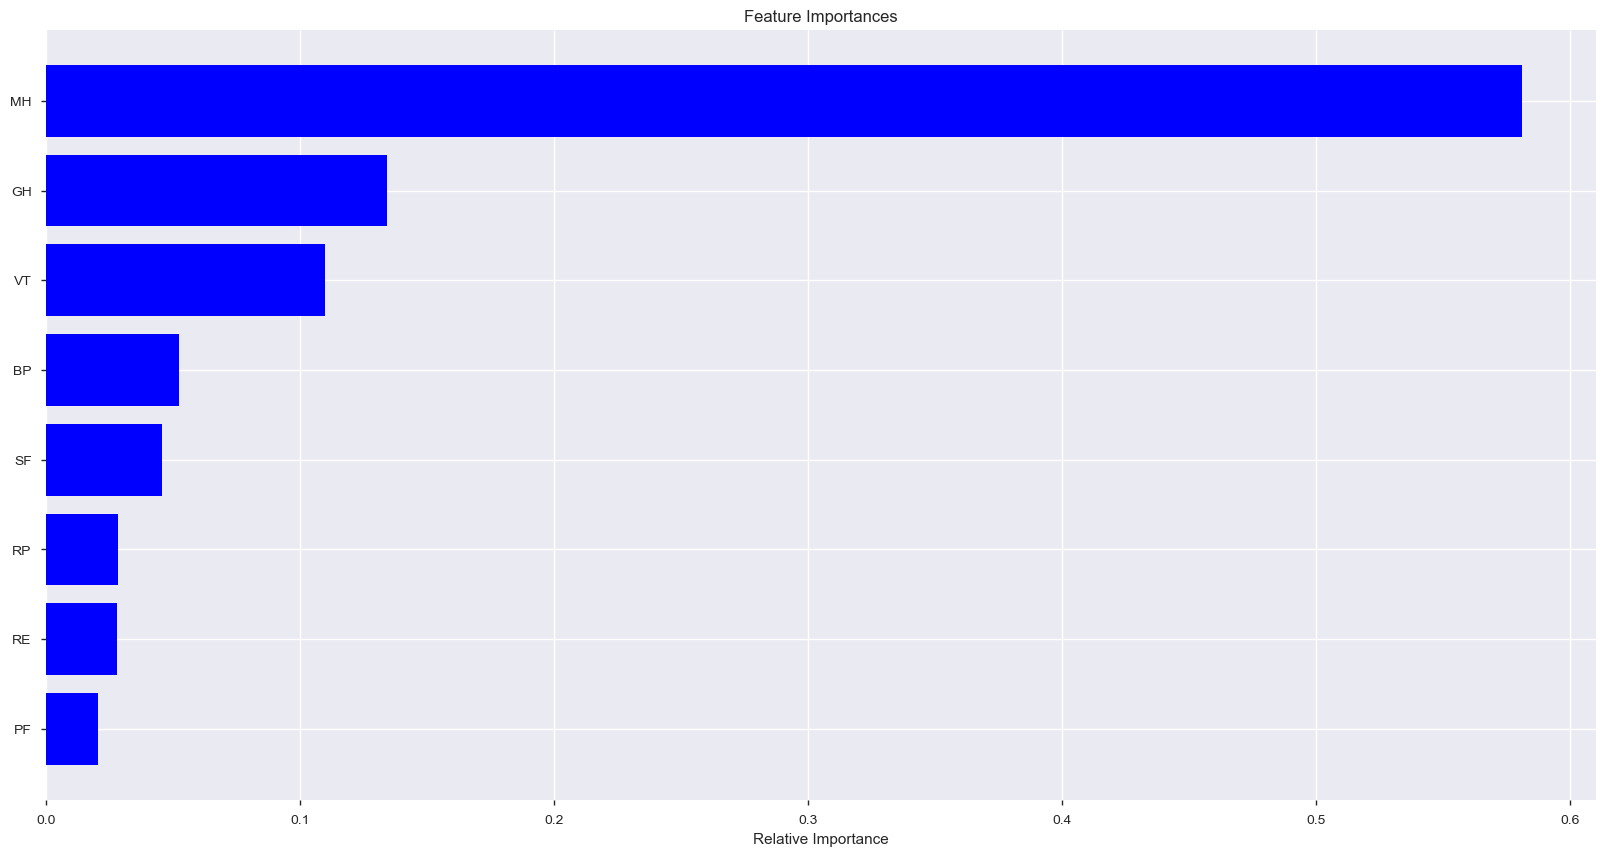

In [125]:
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(train[['PF',
       'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH']], train['S-anxiety'].values)
columns_order = ['PF',
       'RP', 'BP', 'GH', 'VT', 'SF', 'RE', 'MH']

importances = rf.feature_importances_
indices = np.argsort(importances)

fig = plt.figure(figsize=(20,10))

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [columns_order[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()